# **Projet grande dimension** 

## Installation des packages nécessaires à l'étude

In [255]:
# Importation des librairies essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# Librairies Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Supprimer les warnings inutiles
import warnings
warnings.filterwarnings("ignore")

# Options d'affichage Pandas
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes


### À propos du jeu de données

#### Contexte

Un nombre significatif de réservations d'hôtels sont annulées en raison d'annulations ou de non-présentations. Les raisons courantes des annulations incluent des changements de plans, des conflits d'horaire, etc. Cette situation est souvent facilitée par la possibilité d'annuler gratuitement ou à faible coût, ce qui est avantageux pour les clients de l'hôtel mais représente un facteur indésirable et potentiellement une perte de revenus pour les hôtels. Ces pertes sont particulièrement élevées en cas d'annulations de dernière minute.

Les nouvelles technologies impliquant les plateformes de réservation en ligne ont radicalement modifié les possibilités et les comportements des clients en matière de réservation. Cela ajoute une dimension supplémentaire au défi auquel les hôtels doivent faire face pour gérer les annulations, qui ne se limitent plus aux réservations traditionnelles et aux caractéristiques des clients.

L'annulation des réservations a un impact sur plusieurs aspects d’un hôtel :

- Perte de ressources (revenus) lorsque l'hôtel ne parvient pas à revendre la chambre.
- Coûts supplémentaires liés aux canaux de distribution, tels que l'augmentation des commissions ou le paiement de publicités pour vendre ces chambres.
- Réduction des prix à la dernière minute pour revendre une chambre, entraînant une diminution de la marge bénéficiaire.
- Mobilisation de ressources humaines pour gérer les ajustements nécessaires pour les clients.

#### Objectif

L'augmentation du nombre d'annulations nécessite une solution basée sur l'apprentissage automatique (Machine Learning) afin de prédire quelles réservations risquent d’être annulées. INN Hotels Group, une chaîne hôtelière au Portugal, est confrontée à un nombre élevé d'annulations et a sollicité votre entreprise pour des solutions basées sur les données. En tant que data scientist, vous devez analyser les données fournies pour identifier les facteurs ayant une forte influence sur les annulations, construire un modèle prédictif capable d'anticiper les annulations à l'avance et aider à formuler des politiques rentables concernant les annulations et les remboursements.

---

### Description des données

Les données contiennent différentes caractéristiques des réservations des clients. Voici le dictionnaire des données détaillé :

#### Dictionnaire des données :

- **Booking_ID** : Identifiant unique de chaque réservation.
- **no_of_adults** : Nombre d'adultes.
- **no_of_children** : Nombre d'enfants.
- **no_of_weekend_nights** : Nombre de nuits de week-end (samedi ou dimanche) réservées ou passées à l'hôtel.
- **no_of_week_nights** : Nombre de nuits en semaine (lundi à vendredi) réservées ou passées à l'hôtel.
- **type_of_meal_plan** : Type de pension choisie par le client :
  - *Not Selected* – Aucun plan de repas sélectionné.
  - *Meal Plan 1* – Petit-déjeuner.
  - *Meal Plan 2* – Demi-pension (petit-déjeuner et un autre repas).
  - *Meal Plan 3* – Pension complète (petit-déjeuner, déjeuner et dîner).
- **required_car_parking_space** : Le client a-t-il besoin d'un parking ? (0 - Non, 1 - Oui).
- **room_type_reserved** : Type de chambre réservée par le client (les valeurs sont codées par INN Hotels).
- **lead_time** : Nombre de jours entre la réservation et la date d'arrivée.
- **arrival_year** : Année d'arrivée.
- **arrival_month** : Mois d'arrivée.
- **arrival_date** : Jour d'arrivée dans le mois.
- **market_segment_type** : Segment de marché de la réservation.
- **repeated_guest** : Le client est-il un habitué ? (0 - Non, 1 - Oui).
- **no_of_previous_cancellations** : Nombre de réservations précédentes annulées par le client avant la réservation actuelle.
- **no_of_previous_bookings_not_canceled** : Nombre de réservations précédentes non annulées par le client avant la réservation actuelle.
- **avg_price_per_room** : Prix moyen par jour de la réservation (en euros) ; les prix sont dynamiques.
- **no_of_special_requests** : Nombre total de demandes spéciales faites par le client (ex : étage élevé, vue particulière, etc.).
- **booking_status** : Indicateur indiquant si la réservation a été annulée ou non.

## Import des données

In [256]:
df = pd.read_csv("INNHotelsGroup.csv")

In [257]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Compréhension des données

In [258]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 36275  │ │ int64       │ 13    │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                  ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50    ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ no_of_adults            │   0 │     0 │    1.845 │  0.5187 │     0 │     2 │      2 │    2 │    4 │  ▂ █▁  │  │
│ │ no_of_children          │   0 │     0 │   0.1053 │  0.4026 │     0 │     0 │      0 │    0 │   10 │   █    │  │
│ │ no_of_weekend_nights    │   0 │     0 │   0.8107 │  0.8706 │     0 │     0 │      1 │    2 │    7 │   █▃   │  │
│ │ no_of_week_nights       │   0 │     0 │    2.204 │   1.411 │     0 │     1 │      2 │    3 │   17 │   █▄   │  │
│ │ required_car_parking_sp │   0 │     0 │  0.03099 │  0.1733 │     0 │     0 │      0 │    0 │    1 │   █    │  │
│ │ ace                     │     │       │          │         │       │       │        │      │      │        │  │
│ │ lead_time               │   0 │     0 │    85.23 │   85.93 │     0 │    17 │     57 │  126 │  443 │  █▃▂▁  │  │
│ │ arrival_year            │   0 │     0 │     2018 │  0.3838 │  2017 │  2018 │   2018 │ 2018 │ 2018 │ ▂    █ │  │
│ │ arrival_month           │   0 │     0 │    7.424 │    3.07 │     1 │     5 │      8 │   10 │   12 │ ▂▄▅▅█▅ │  │
│ │ arrival_date            │   0 │     0 │     15.6 │    8.74 │     1 │     8 │     16 │   23 │   31 │ ▇▇██▇█ │  │
│ │ repeated_guest          │   0 │     0 │  0.02564 │  0.1581 │     0 │     0 │      0 │    0 │    1 │   █    │  │
│ │ no_of_previous_cancella │   0 │     0 │  0.02335 │  0.3683 │     0 │     0 │      0 │    0 │   13 │   █    │  │
│ │ tions                   │     │       │          │         │       │       │        │      │      │        │  │
│ │ no_of_previous_bookings │   0 │     0 │   0.1534 │   1.754 │     0 │     0 │      0 │    0 │   58 │   █    │  │
│ │ _not_canceled           │     │       │          │         │       │       │        │      │      │        │  │
│ │ avg_price_per_room      │   0 │     0 │    103.4 │   35.09 │     0 │  80.3 │  99.45 │  120 │  540 │   ▅█   │  │
│ │ no_of_special_requests  │   0 │     0 │   0.6197 │  0.7862 │     0 │     0 │      0 │    1 │    5 │  █▅▂   │  │
│ └─────────────────────────┴─────┴───────┴──────────┴─────────┴───────┴───────┴────────┴──────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min 

In [259]:
df.shape

(36275, 19)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Certaines variables comme required_car_parking_space ne semble pas au bon format nous les corrigerons lors de l'analyse détaillée de chaque variable.

In [261]:
df.isnull().sum()
# pas de données manquantes

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Analyse détaillée de chaque variable

* Booking_ID

In [262]:
# supprimer Booking_ID
df.drop(columns=["Booking_ID"], inplace= True)

* Type des variables : 

Les variables : required_car_parking_space, arrival_year , arrival_month, arrival_date, repeated_guest semblent sous le mauvais type les changer. 

In [263]:
df[["required_car_parking_space", "repeated_guest"]] = df[["required_car_parking_space", "repeated_guest"]].astype("object")

In [264]:
# Voir si utile de mettre les variables arrival_year , arrival_month, arrival_date en formats datetime ??? (Mélanie : je ne pense pas )

In [265]:
# Variables numériques :
info_df_num = df.describe()

nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(df[v].isnull().sum())
    nb_distincts.append(len(set(df[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(df)

print(info_df_num_2)

                               variables  Nb value distinct  Nb value missing  \
0                           no_of_adults                  5                 0   
1                         no_of_children                  6                 0   
2                   no_of_weekend_nights                  8                 0   
3                      no_of_week_nights                 18                 0   
4                              lead_time                352                 0   
5                           arrival_year                  2                 0   
6                          arrival_month                 12                 0   
7                           arrival_date                 31                 0   
8           no_of_previous_cancellations                  9                 0   
9   no_of_previous_bookings_not_canceled                 59                 0   
10                    avg_price_per_room               3930                 0   
11                no_of_spec

In [266]:
#info sur les varibales catégorielles :
info_types = pd.DataFrame(df.dtypes)

list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(df[v].isnull().sum())
    nb_distincts.append(len(set(df[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

                    variables  Nb value distinct  Nb value missing
0           type_of_meal_plan                  4                 0
1  required_car_parking_space                  2                 0
2          room_type_reserved                  7                 0
3         market_segment_type                  5                 0
4              repeated_guest                  2                 0
5              booking_status                  2                 0


booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


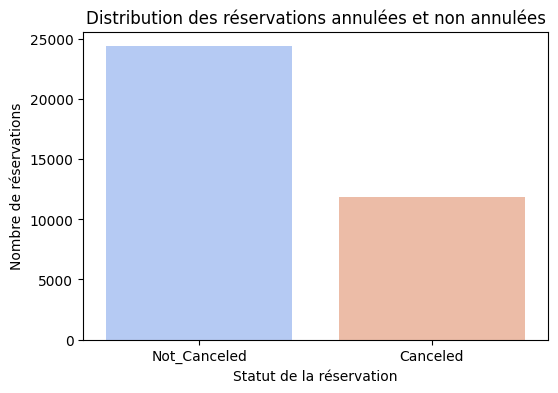

In [267]:
# Compter le nombre de réservations annulées et non annulées
print(df["booking_status"].value_counts())

# Visualisation
plt.figure(figsize=(6,4))
sns.countplot(x=df["booking_status"], palette="coolwarm")
plt.title("Distribution des réservations annulées et non annulées")
plt.xlabel("Statut de la réservation")
plt.ylabel("Nombre de réservations")
plt.show()


## Analyse univarié 

### 📊 Affichage de toutes les vairables catégorielles :

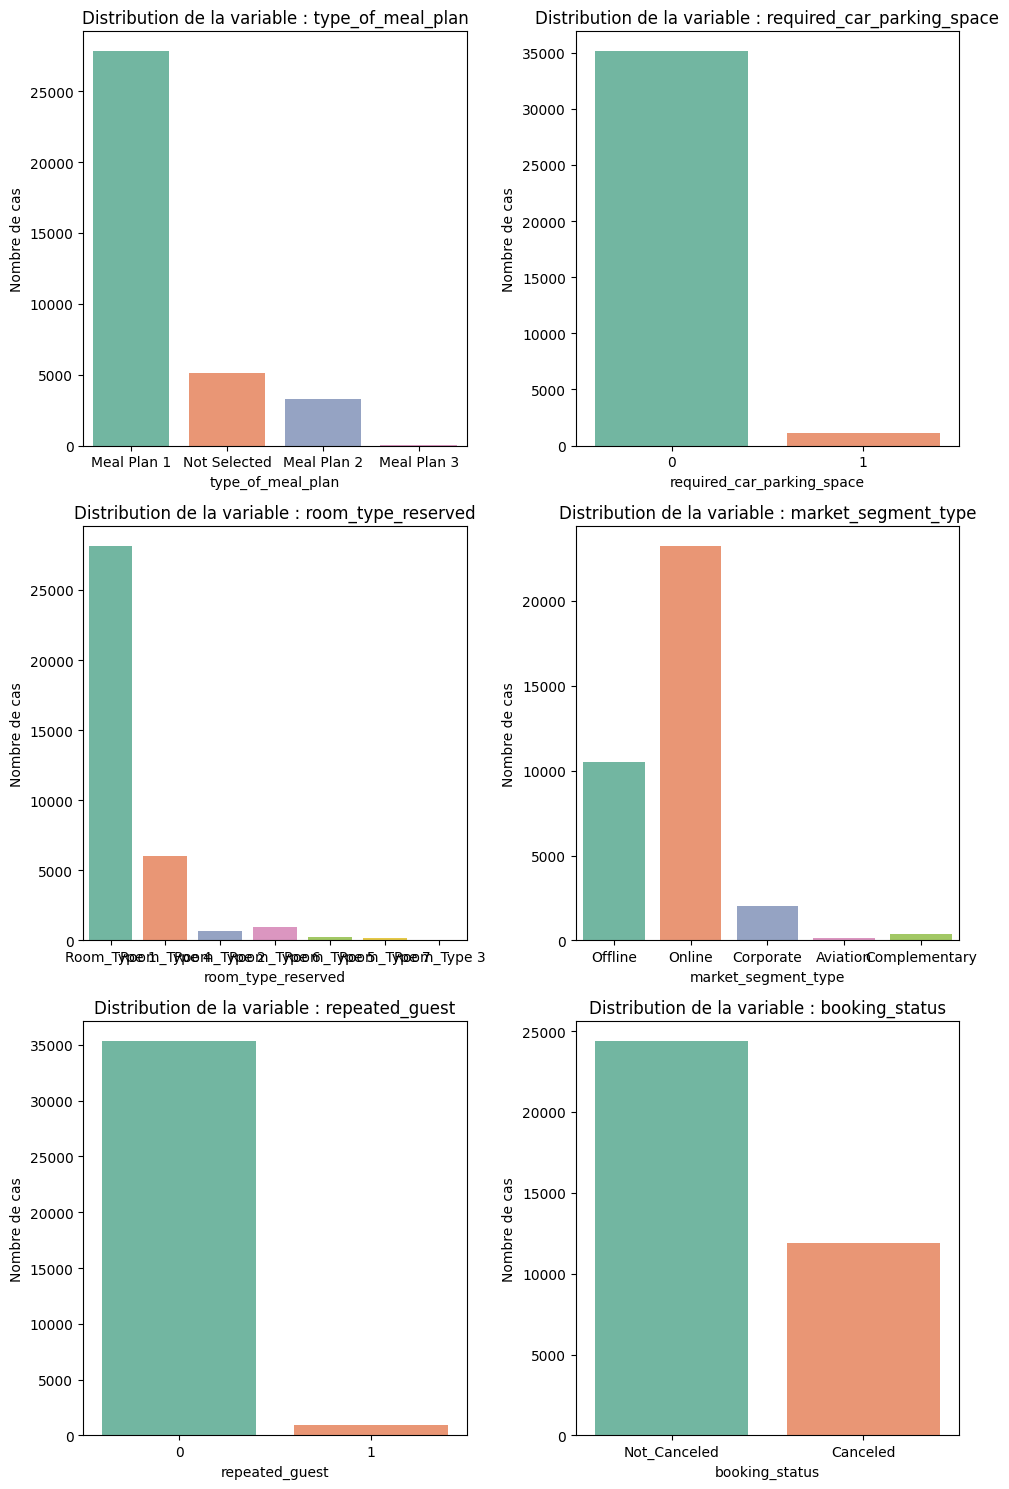

In [268]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=col, data=df, palette='Set2')  
    plt.title(f'Distribution de la variable : {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre de cas')

plt.tight_layout() 
plt.show()


### 📊 Affichage de toutes les variables continues :

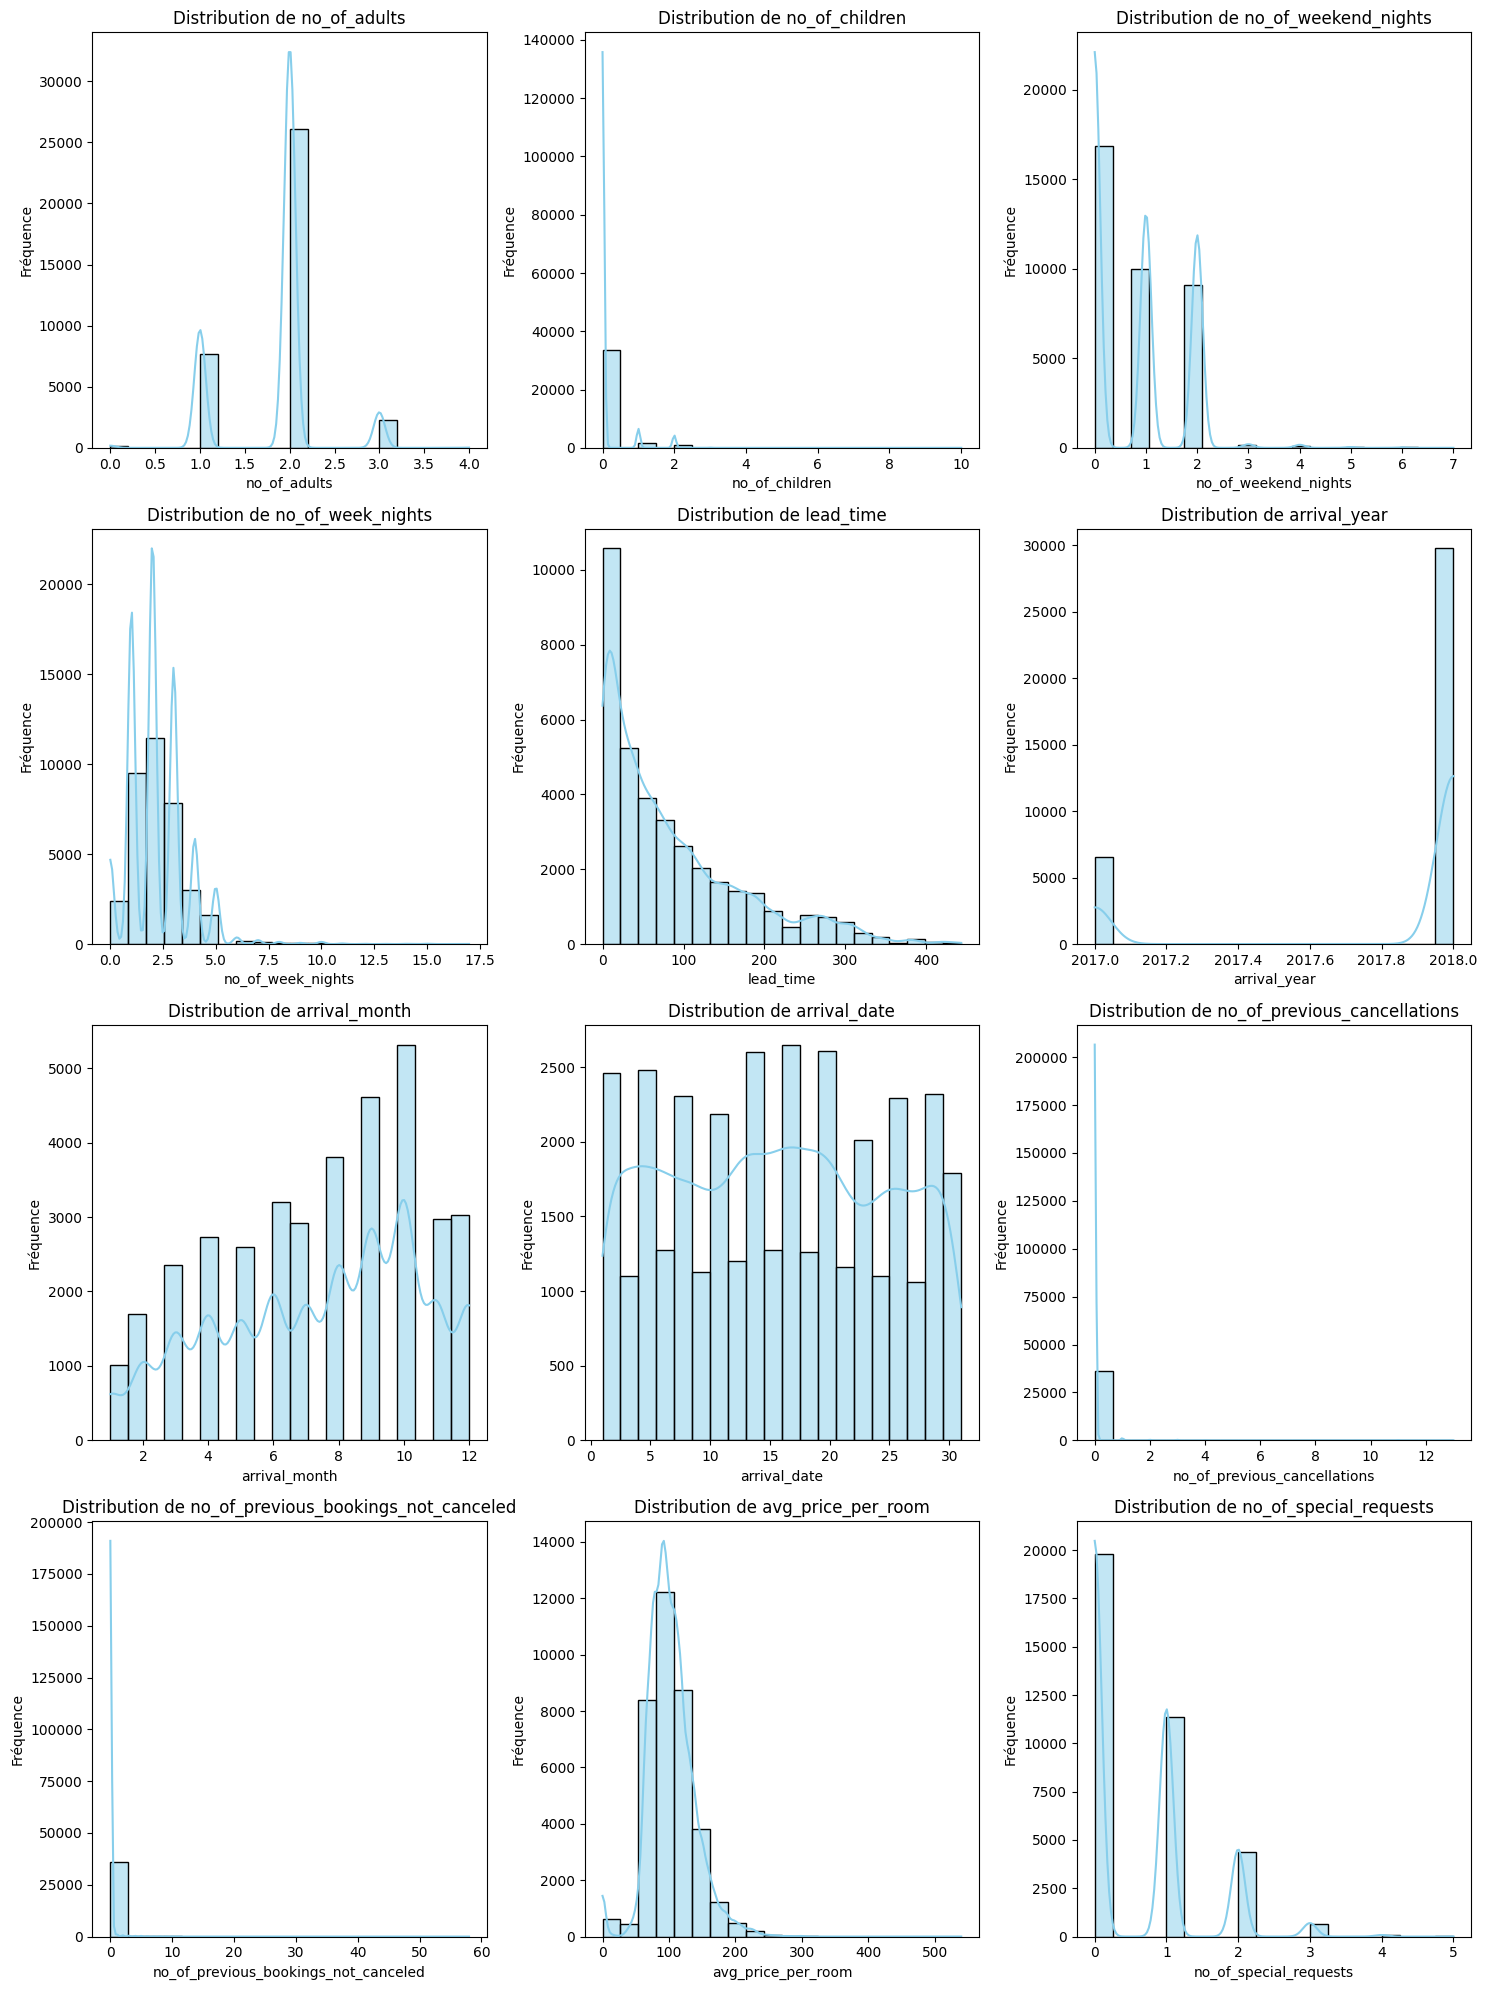

In [269]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3  
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5)) 

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)  
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

plt.tight_layout()  
plt.show()


ATTENTION ! 

La vraiable avg_price_per_room semble avoir des valeurs à 0 ce qui peut etre étrange (ou simplement du au fait que certains clients on eut des promotions). Regardez plus en détail : 

In [270]:
df[df["avg_price_per_room"] == 0].shape[0]/df.shape[0] *100

1.5024121295658166

In [271]:
# 1,5% des réservations ont un prix moyen par chambre égal à 0. Si on croise cette information avec market_segment_type : 

In [272]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

On constate que la plus par des reservation avec un prix moyen par chambre égal à 0 sont des réservations de type "Complementary" (réservations offertes gratuitement ou à des séjours financés par un tiers). The rooms booked online must be a part of some promotional campaign done by the hotel.

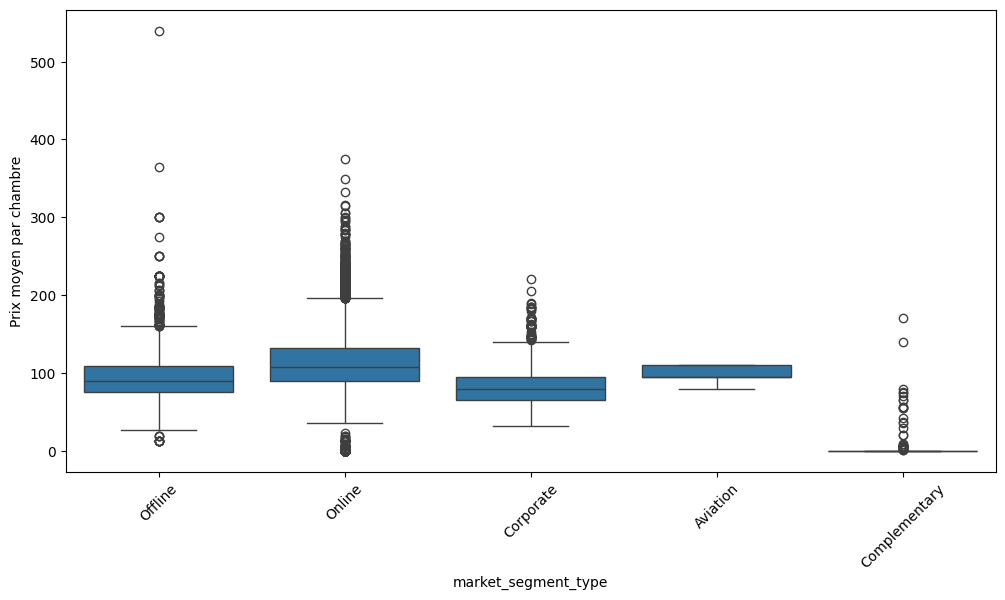

In [273]:
# regarder les prix des chambre en focntion de la variable market_segment_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=df)
plt.xlabel('market_segment_type')
plt.ylabel('Prix moyen par chambre')
plt.xticks(rotation=45)
plt.show()

- Rooms booked online have high variations in prices.
- The offline and corporate room prices are almost similar.
- Complementary market segment gets the rooms at very low prices, which makes sense.

### 📊 Affichage des boxplots de toutes les variables continues :

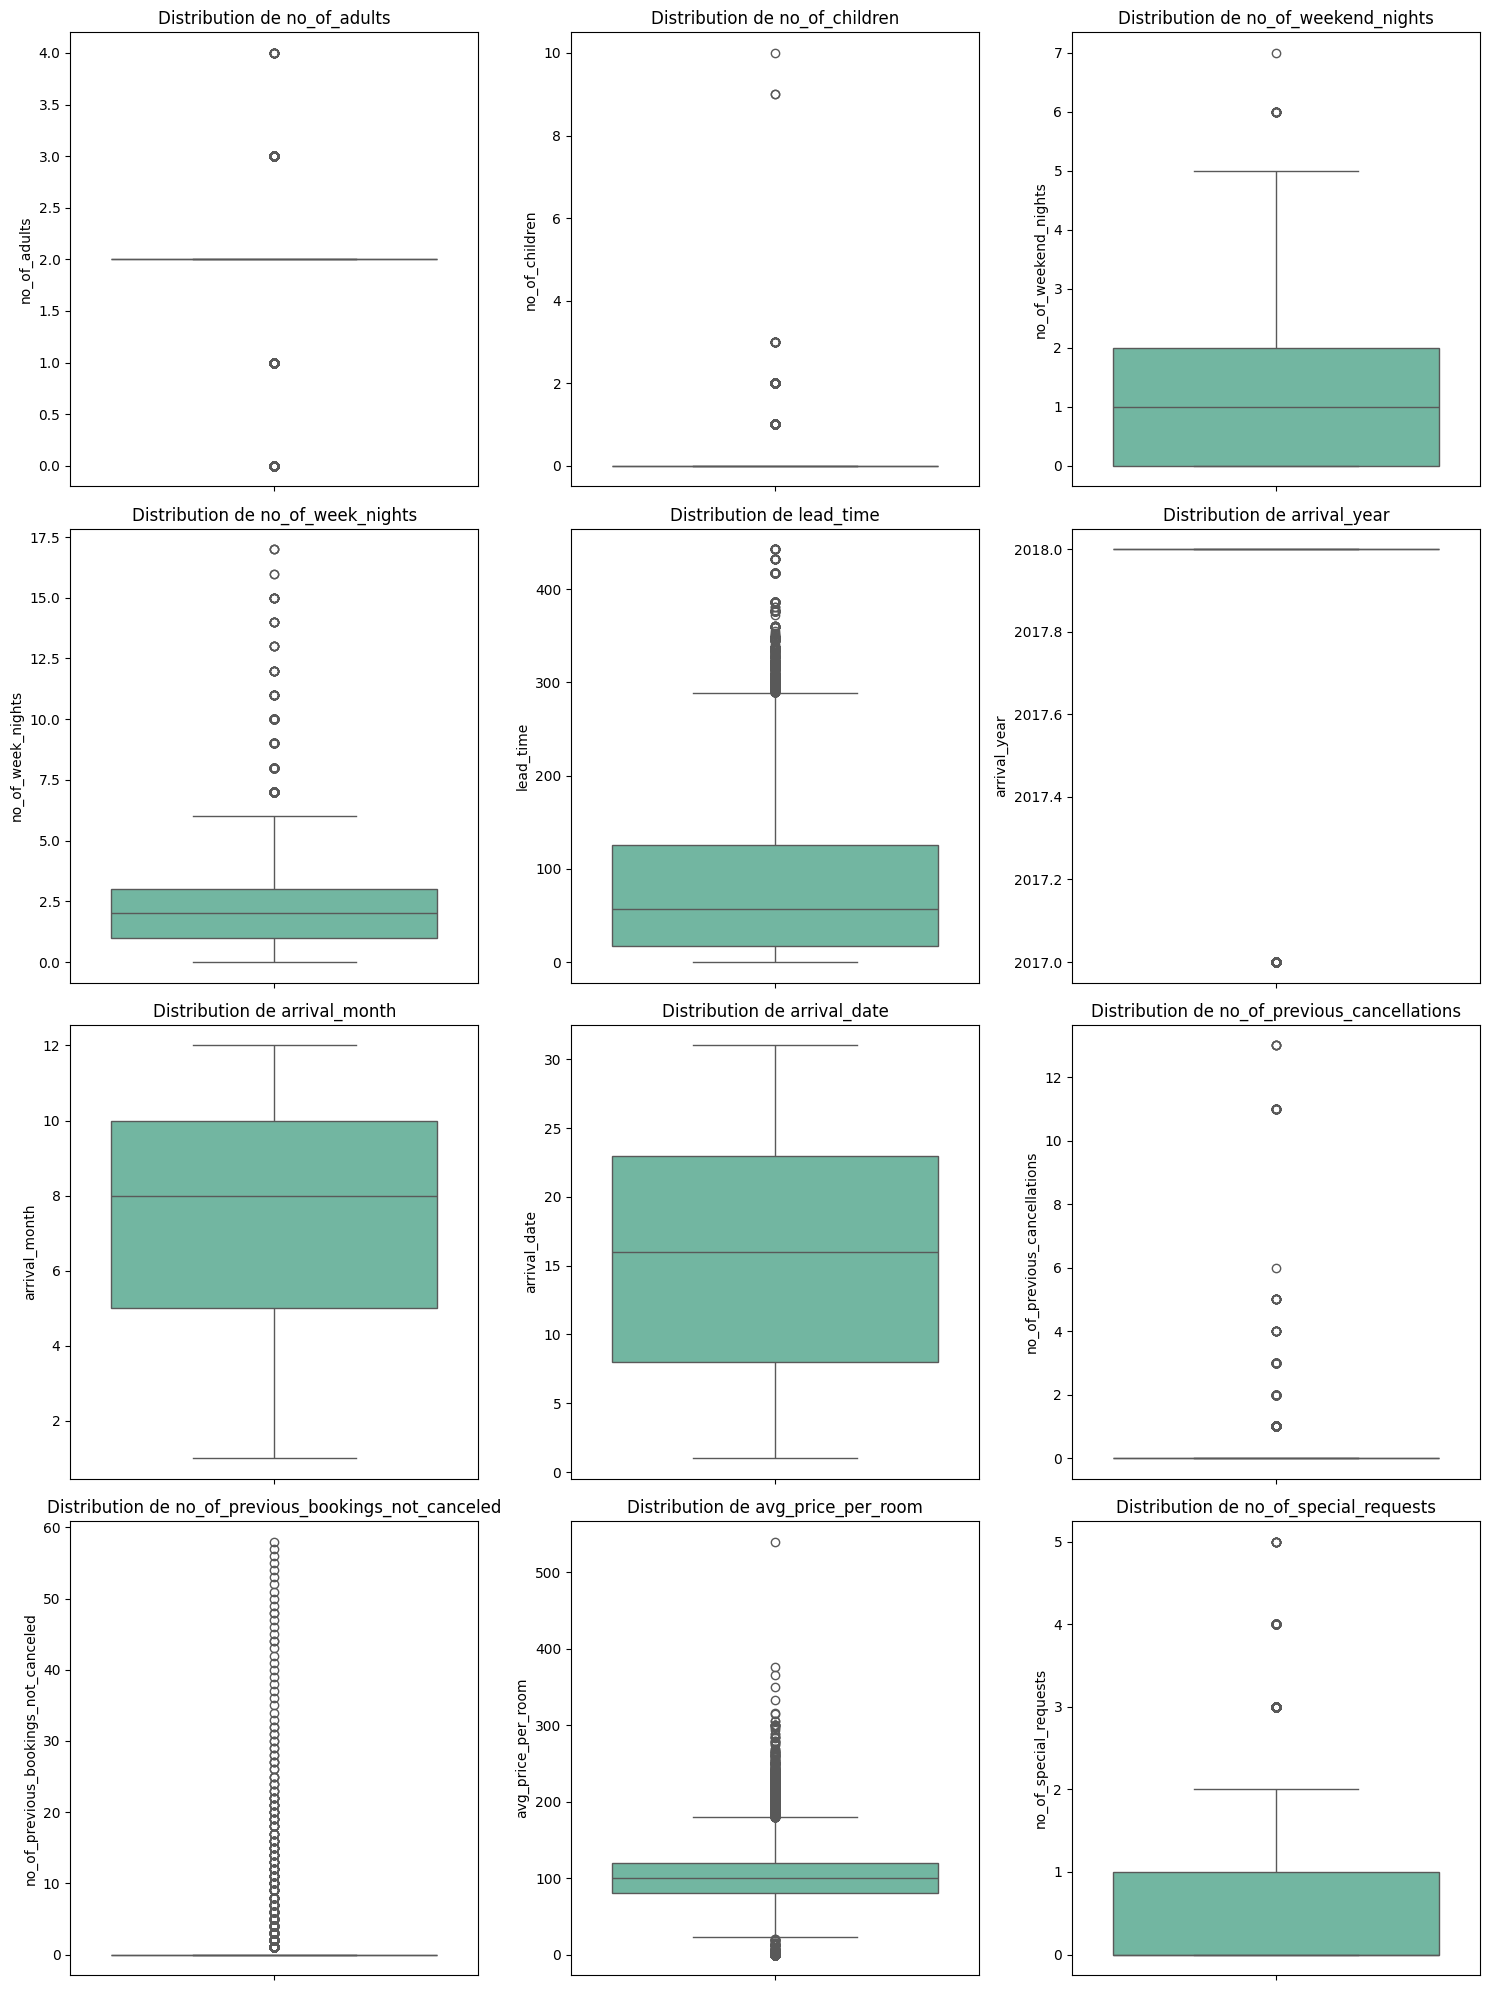

In [274]:
n_cols = 3
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=df[col], palette='Set2')  
    plt.title(f'Distribution de {col}')
    plt.ylabel(col)

plt.tight_layout()

plt.show()



* Il semble y avoir des valeurs extremes pour avg_price_per_room. regardons ça plus en detail : 

In [275]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

np.float64(179.55)

In [276]:
df[df["avg_price_per_room"] > 500]
# dans cet exemple on constate que :
# -room_type_reserved : Room_Type_1
# -Booking_status est annulé 
# - room_type_reserved : Room_Type_1 (seulement un petit dejeuner)
# => prix suspect au vu de la prestation choisie
# (il sera donc interressant de le regarder en détail).

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                          0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type repeated_guest  no_of_previous_cancellations  \
33114             Offline              0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0               540.0   

       no_of_special_requests booking_status  
33114                       0       Canceled

In [277]:
# Une seule variable dans ce cas la 
df[(df["avg_price_per_room"] > 500) & (df["room_type_reserved"] == "Room_Type 1")]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                          0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type repeated_guest  no_of_previous_cancellations  \
33114             Offline              0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0               540.0   

       no_of_special_requests booking_status  
33114                       0       Canceled

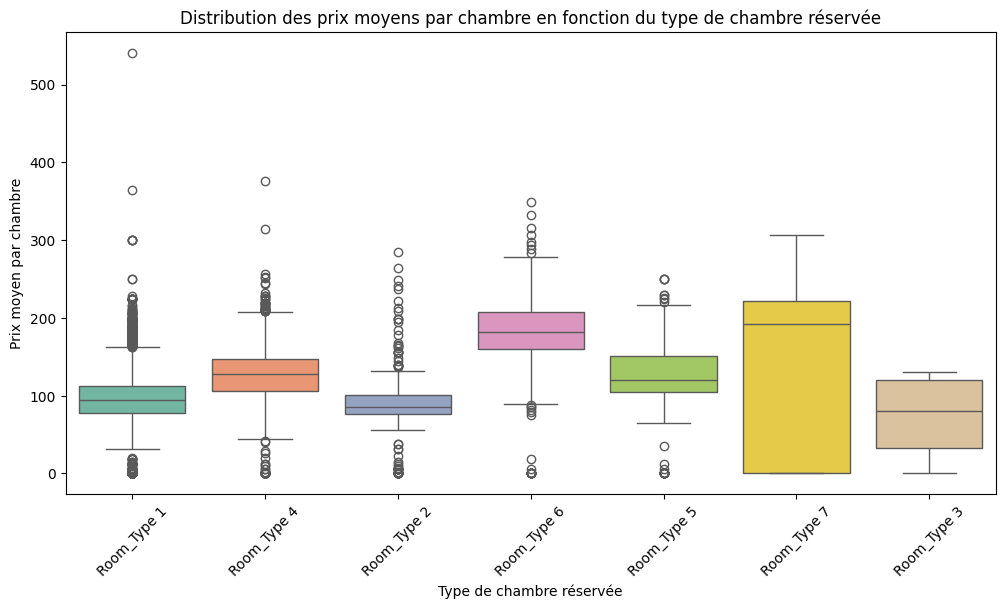

In [ ]:
# regarder les prix des chambre en focntion de la variable room_type_reserved
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type_reserved', y='avg_price_per_room', data=df)
plt.title('Distribution des prix moyens par chambre en fonction du type de chambre réservée')
plt.xlabel('Type de chambre réservée')
plt.ylabel('Prix moyen par chambre')
plt.xticks(rotation=45)
plt.show()

Les types de chambre ne semblent pas croissant en fonction des prix (chambre de type 1 moins cher qu'une chembre de type 6 par exemple)

In [278]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

* Il semble aussi avoir des valeur etrange pour no_of_children : 

In [279]:
df['no_of_children'].value_counts(normalize=True)

no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: proportion, dtype: float64

- Customers were not travelling with children in 93% of cases.
- There are some values in the data where the number of children is 9 or 10, which is highly unlikely.
- We will replace these values with the maximum value of 3 children.


In [280]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

## Analyse multivariré

### 📊 Affichage de toutes les variables catégorielles en fonction de la variable cible :

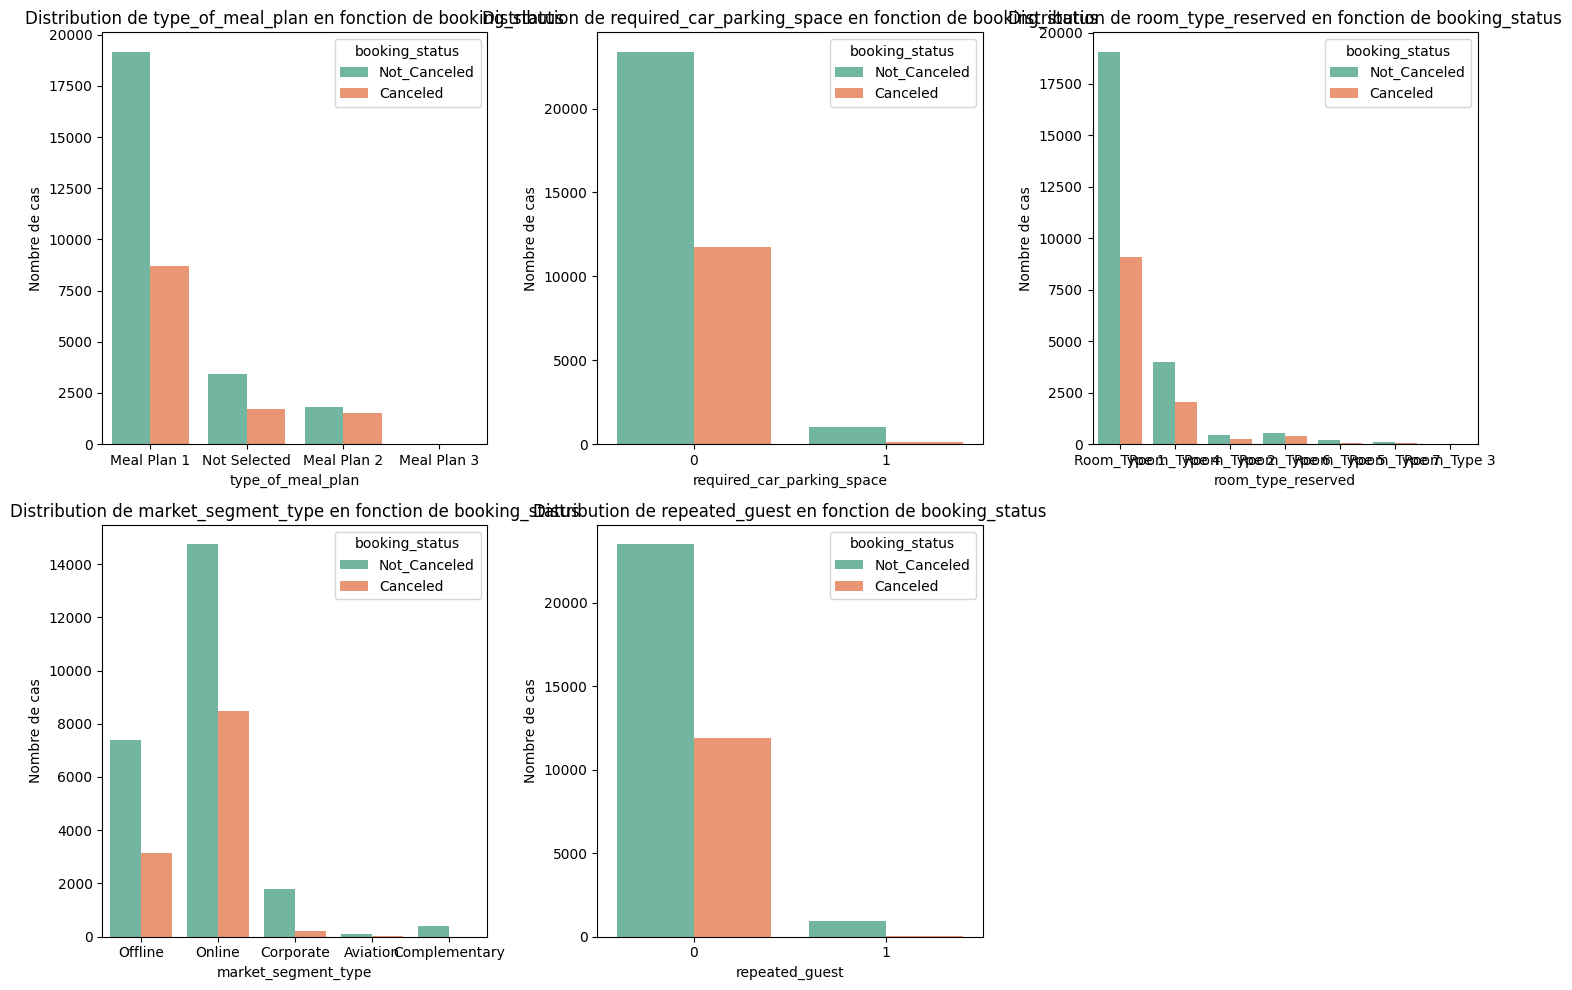

In [281]:
# Retirer la variable cible 'booking_status' de la liste des variables catégorielles
categorical_columns = categorical_columns[categorical_columns != 'booking_status']

n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=col, hue='booking_status', data=df, palette='Set2')  
    plt.title(f'Distribution de {col} en fonction de booking_status')
    plt.xlabel(col)
    plt.ylabel('Nombre de cas')

plt.tight_layout()  
plt.show()


> market_segment_type : 
- complementary users are the most common customer and the conversion is also highest from all type of customer.
- corporate users are the most 2nd common customer and the conversion is also the second highest from all type of customer.
- Based on this, the company can make a possible refund policies or no show actions from customer from online, offline, and aviation market segments.

> repeated_guest :
- The conversion rate for customers from repeated_guestis higher.
- The company can make a possible refund policies or no show actions from customer from non repeated_guest market segment.

### 📊 Affichage de toutes les variables continues en fonction de la variable cible 

Fonction trouvé dans un notebook.

In [282]:
def plot_var_continues(continuous_columns, df, hue_var="Status"):
    # Définir la taille de la figure principale
    num_vars = len(continuous_columns)  # Nombre de variables
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Calculer le nombre de lignes (3 colonnes par défaut)
    plt.figure(figsize=(21, 7 * rows))  # Taille ajustée en fonction des lignes
    
    for i, var in enumerate(continuous_columns[:-1], start=1):  # Commence à 1 pour l'index des sous-graphiques
        plt.subplot(rows, 3, i)
        
        # Tracer le kdeplot
        sns.kdeplot(
            data=df, 
            x=var, 
            hue=hue_var, 
            fill=True, 
            palette="Purples", 
            common_norm=True
        )
        sns.despine(top=True, right=True, bottom=True, left=True)  # Supprime les cadres inutiles
        plt.tick_params(axis="both", which="both", bottom=False, top=False, left=False)
        plt.xlabel("")  # Supprimer les labels des x
        plt.title(var, fontsize=14)  # Ajouter un titre pour chaque graphique
    
    # Afficher tous les graphiques ensemble
    plt.tight_layout()
    plt.show()

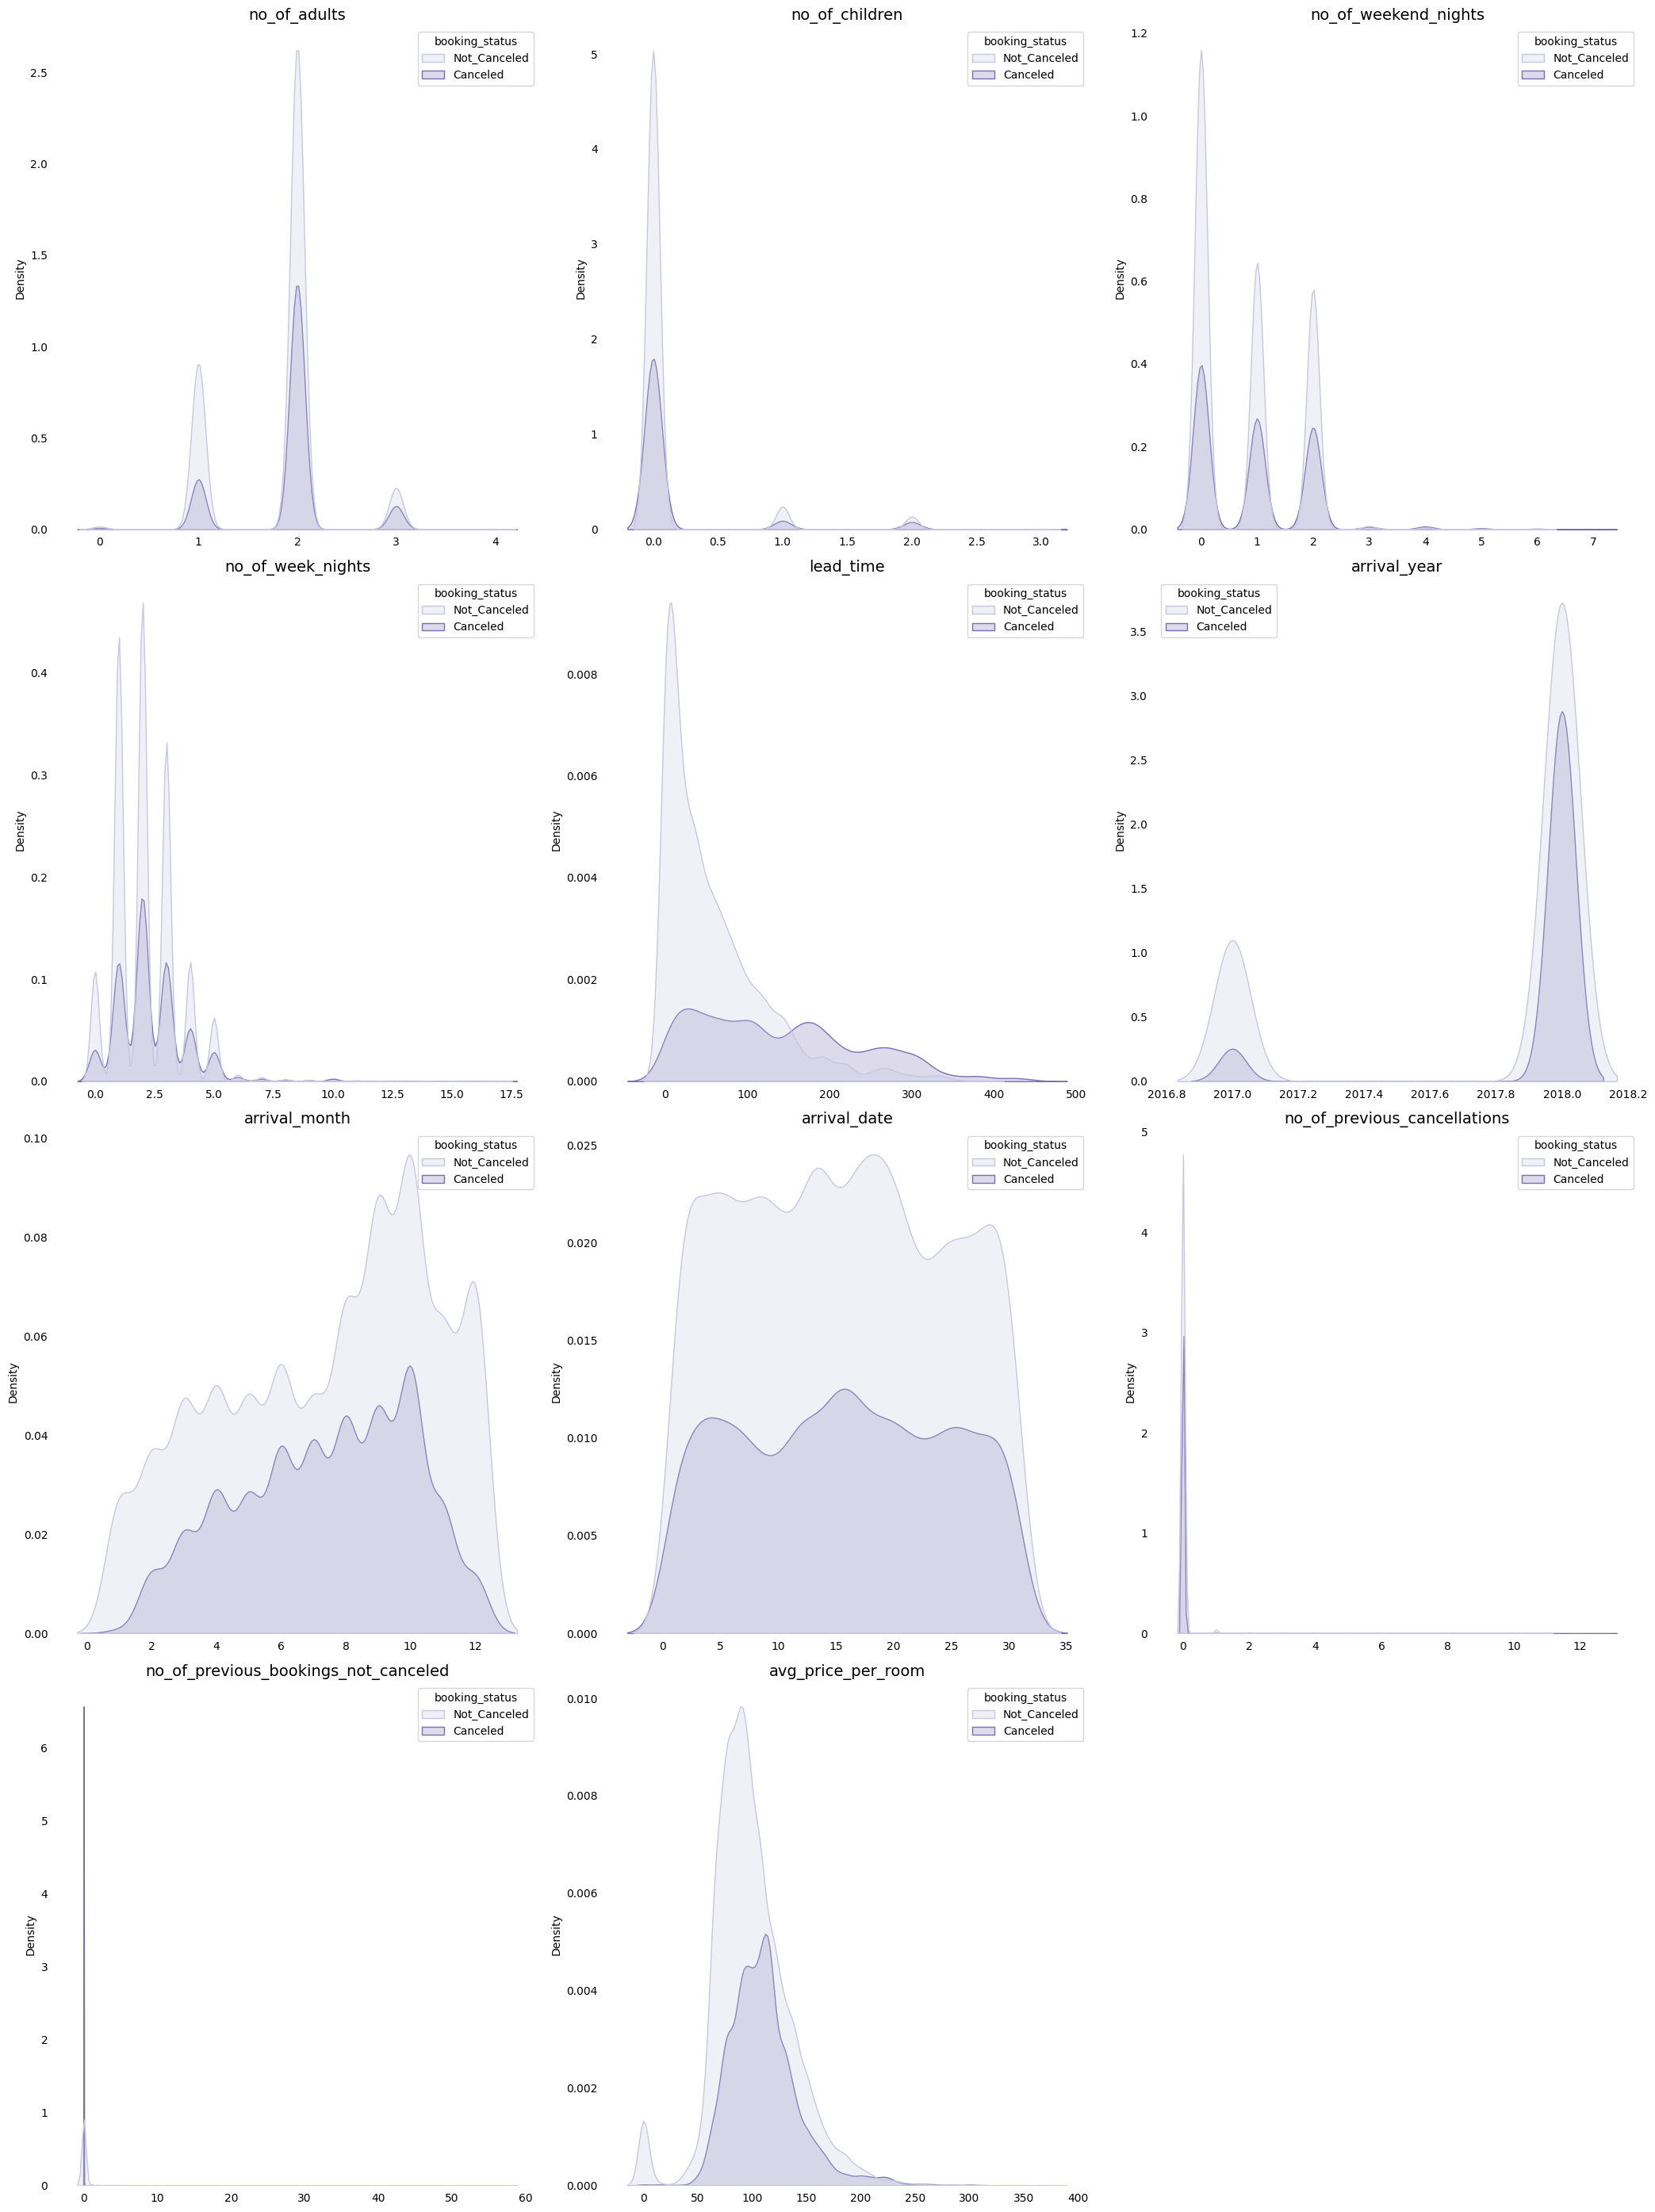

In [283]:
plot_var_continues(continuous_columns, df, hue_var="booking_status")

- Les réservations annulées ont tendance à avoir des lead times plus longs.
- Les réservations non annulées sont plus concentrées sur de faibles lead times.

- Les reservations avec des prix tres bas semblent pas annulés
- Les annulations sont plus fréquentes pour les prix plus élevés.

### 📊 Affichage des boxplots de toutes les variables continues en fonction de la variable cible :

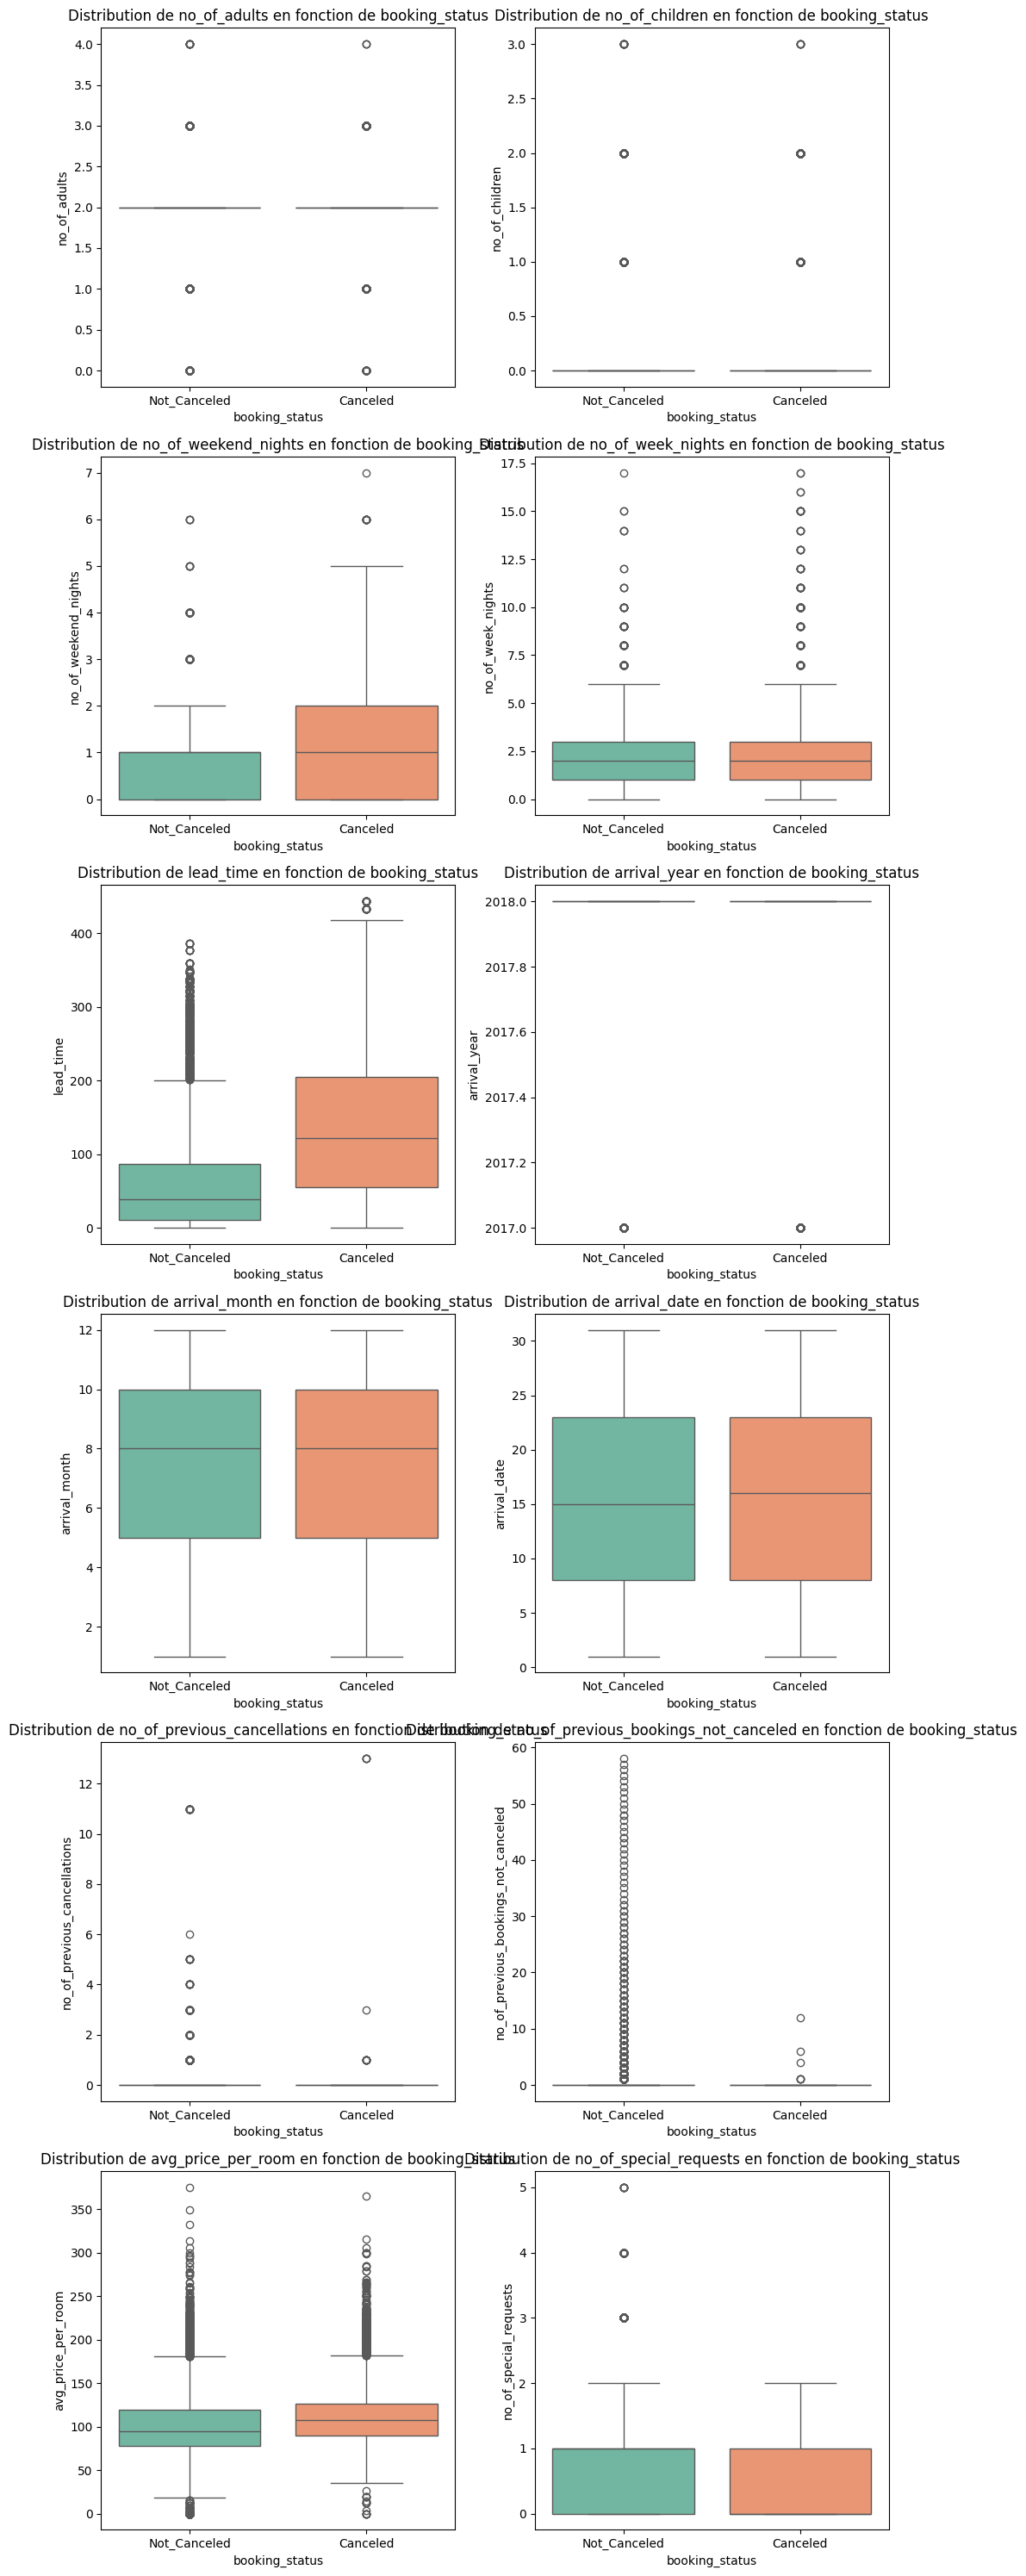

In [284]:
n_cols = 2  # Nombre de colonnes par ligne
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(x='booking_status', y=col, data=df, palette='Set2') 
    plt.title(f'Distribution de {col} en fonction de booking_status')
    plt.xlabel('booking_status')
    plt.ylabel(col)

plt.tight_layout()  
plt.show()


- Les réservations annulées ont un lead time plus long en moyenne.
- Les reservations annulés ont un nombre de nuit en weekend plus élevé.
- Les réservations annulées ont tendance à avoir un prix moyen légerement plus élevé (La médiane du prix pour les réservations annulées est plus haute que pour celles confirmées)

### 📊 Interprétation de la Matrice de Corrélation  

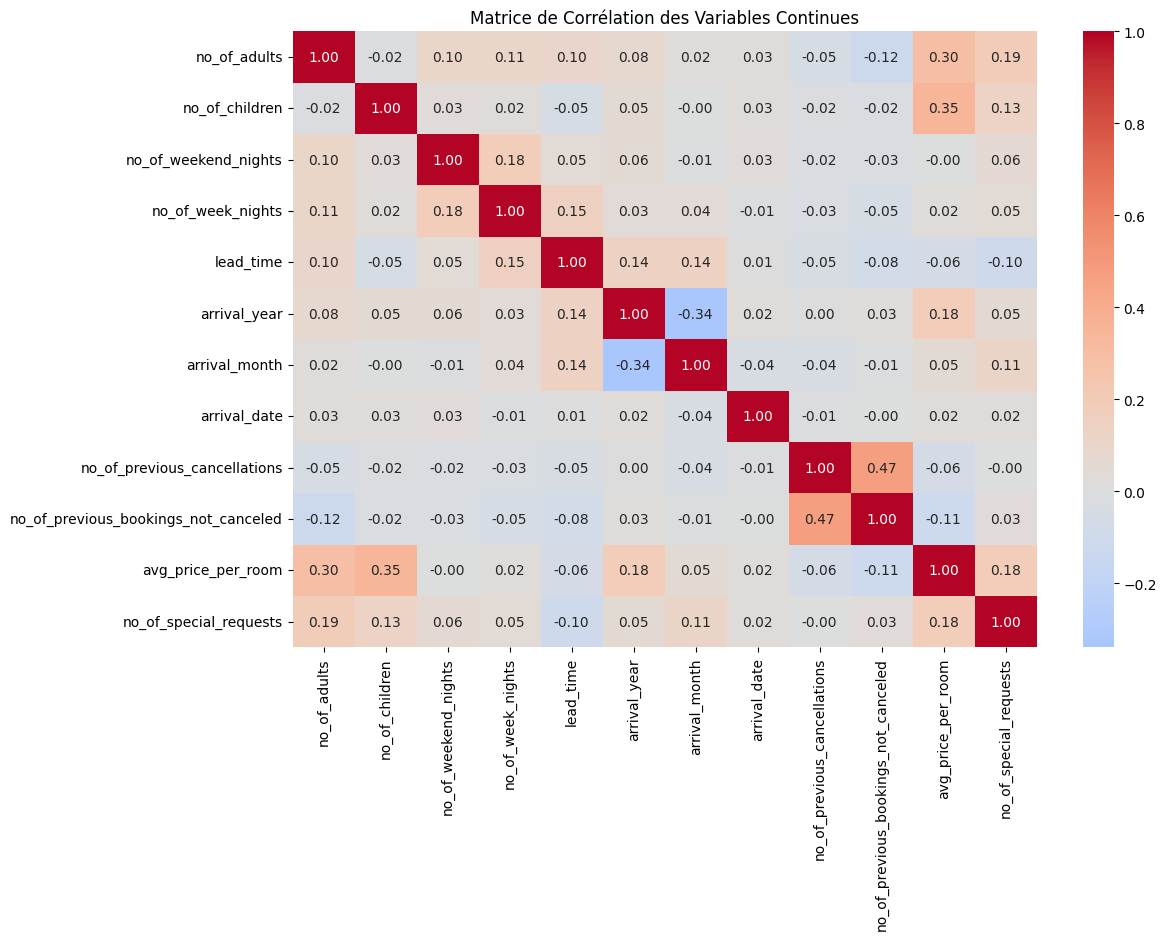

In [285]:
corr_matrix = df[continuous_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation des Variables Continues')
plt.show()


- repeated_guest and no_of_previous_bookings_not_canceled are positively correlated.
- repeated_guest and no_of_previous_cancellations are positively correlated.
- no_of_previous_cancellations and no_of_previous_bookings_not_canceled are positively correlated.
- lead_time and booking_status are positively correlated.
- avg_price_per_room and no_of_adults are positively correlated.
- avg_price_per_room and no_of_children are positively correlated.

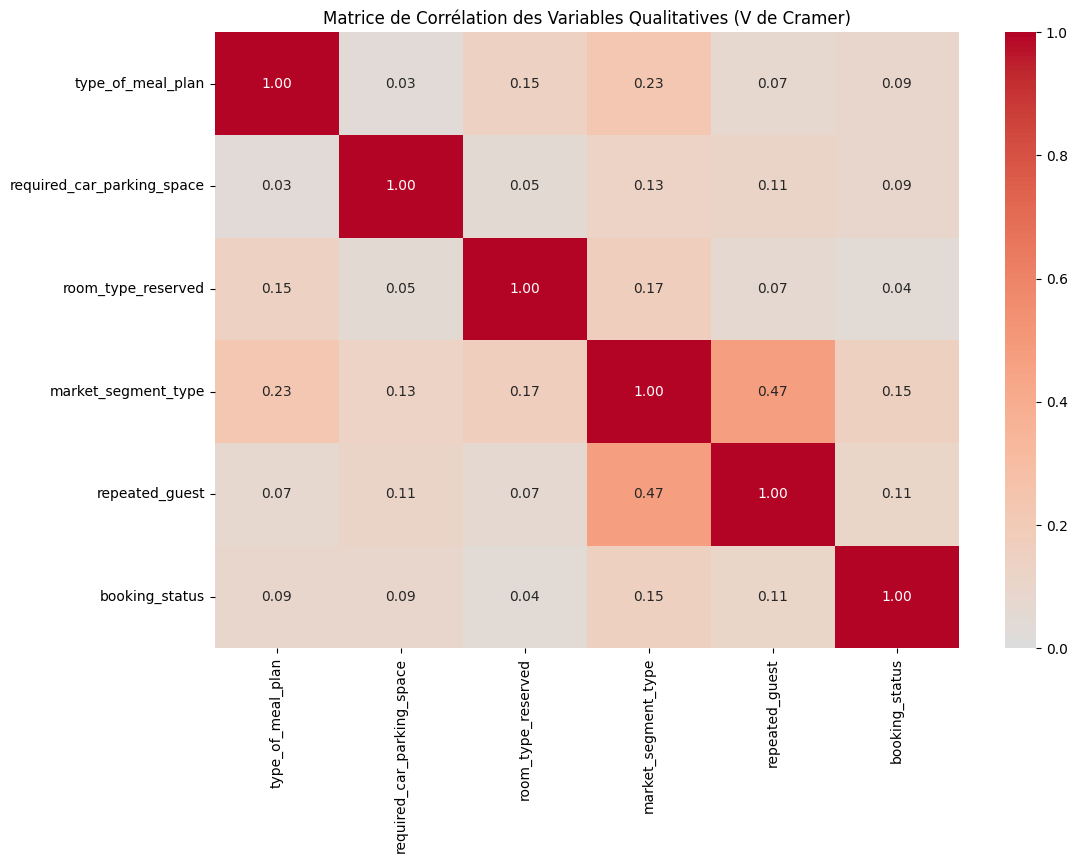

In [286]:
import scipy.stats as ss

def cramers_v(x, y):
    """Calcule le V de Cramer entre deux variables catégorielles."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Sélection des colonnes qualitatives
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns =  categorical_columns[categorical_columns != 'Booking_ID']

cramer_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                             index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1  

plt.figure(figsize=(12, 8))
sns.heatmap(cramer_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=0, vmax=1)
plt.title("Matrice de Corrélation des Variables Qualitatives (V de Cramer)")
plt.show()


### 📌 Test du Chi2 pour déterminer s’il existe un lien entre les variables catégorielles et la variables cible (pareil que le graph precedant voir lequel garder):

In [287]:
# Test du Chi2 pour déterminer s’il existe un lien entre 2 variables catégorielles :
from scipy.stats import chi2_contingency

for col in categorical_columns:
    if col != 'Status':
        contingency_table = pd.crosstab(df[col], df['booking_status'])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

        print(f"Variable : {col}")
        print(f"Statistique du chi-carré : {chi2_stat}")
        print(f"Valeur p : {p_val}")
        print("\n")


Variable : type_of_meal_plan
Statistique du chi-carré : 278.29490920586017
Valeur p : 4.95191540608779e-60


Variable : required_car_parking_space
Statistique du chi-carré : 268.3884673400529
Valeur p : 2.5476490215438695e-60


Variable : room_type_reserved
Statistique du chi-carré : 57.33495179790707
Valeur p : 1.5627796772447482e-10


Variable : market_segment_type
Statistique du chi-carré : 814.108865240557
Valeur p : 6.748763024557236e-175


Variable : repeated_guest
Statistique du chi-carré : 416.09555137693894
Valeur p : 1.7270504808167525e-92


Variable : booking_status
Statistique du chi-carré : 36270.460685547536
Valeur p : 0.0




## Préparation des données pour la modélisation 

### Préparation variables catégorielles

Il faufrait proposer plusieurs fonctions qui font des encodages différents pour voir si cela peut ameliorer notre modélisation

In [288]:
# Recoder la variable cible 
df["booking_status"] = df["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

In [289]:
target = "booking_status"

In [290]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'market_segment_type', 'repeated_guest'],
      dtype='object')

In [291]:
var_cat_plus_4 = []
var_cat_moins_4 = []

for var in categorical_columns : 
    print(df[var].value_counts())
    print(len(df[var].value_counts()))
    if len(df[var].value_counts()) >= 4 : 
        var_cat_plus_4.append(var)
    else :
        var_cat_moins_4.append(var)
    
    print(var_cat_plus_4,var_cat_moins_4)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
4
['type_of_meal_plan'] []
required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64
2
['type_of_meal_plan'] ['required_car_parking_space']
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
7
['type_of_meal_plan', 'room_type_reserved'] ['required_car_parking_space']
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
5
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'] ['required_car_parking_space']
repeated_guest
0    35345
1      930
Name: count, dtype: int64
2
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'] ['required_car_parking_space', 'repeated_guest']


In [292]:
# Méthode 1 pour l'encodage : 
# Les variables catégorielles a plus de 4 modalités sont remplacées par la varible moyenne de la variable cible par modalité

for v in var_cat_plus_4:
    tmp = pd.DataFrame(df.groupby(by=[v])[target].mean())
    df= df.join(tmp, on=v, how='left', lsuffix='', rsuffix= "_%_"+ v , sort=False)

df[["required_car_parking_space", "repeated_guest"]] = df[["required_car_parking_space", "repeated_guest"]].astype("int64")


In [293]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# X_train_with_const = add_constant(df)
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_train_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
# print(vif_data)

### Définir les variables d'apprentissage

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [295]:
var_selection = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
var_selection.remove("booking_status")

In [296]:
len(var_selection)

17

In [297]:
X=df[var_selection]

In [298]:
X.shape[1]

17

In [299]:
Y = df["booking_status"]

### Séparation en train/test

La variables cibles est désequilibrée. On va respecter cette repartition dans le jeu d'apprentissage et de test (echantillon stratiffié).

In [300]:
# Optimiser la taille du découpage par le suite 
X_train, X_test, y_train , y_test = train_test_split(X, Y, test_size=0.8, stratify=Y, random_state=42)

In [301]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7255, 17)
Shape of test set :  (29020, 17)
Percentage of classes in training set:
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64


In [302]:
X_train

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
17913             2               1                     0                  4   
34127             2               0                     1                  3   
10264             1               0                     0                  1   
28625             2               0                     0                  3   
9658              1               0                     2                  4   
...             ...             ...                   ...                ...   
9665              1               0                     2                  0   
5447              2               0                     2                  2   
7701              2               0                     0                  2   
26189             2               0                     0                  2   
12246             2               0                     1                  5   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
17913                           0        112          2018             12   
34127                           0         95          2018              5   
10264                           0        164          2017             10   
28625                           0        105          2018             10   
9658                            0          2          2018             11   
...                           ...        ...           ...            ...   
9665                            0          4          2017              9   
5447                            0        208          2018              6   
7701                            0        122          2018              5   
26189                           0        315          2018             12   
12246                           1        133          2018              5   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
17913             6               0                             0   
34127            19               0                             0   
10264             2               0                             0   
28625            12               0                             0   
9658             25               0                             0   
...             ...             ...                           ...   
9665             20               0                             0   
5447             11               0                             0   
7701             12               0                             0   
26189             2               0                             0   
12246            24               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
17913                                     0              100.30   
34127                                     0              132.60   
10264                                     0              100.00   
28625                                     0               75.00   
9658                                      0               91.38   
...                                     ...                 ...   
9665                                      0              111.20   
5447                                      0               80.24   
7701                                      0              105.30   
26189                                     0               52.00   
12246                                     0              127.15   

       no_of_special_requests  booking_status_%_type_of_meal_plan  \
17913                       2                            0.311802   
34127                       1                            0.311802   
10264                       0                            0.311802   
28625                       0                            0.311802   
9658                        0                            0.311802   
...                       ...                                 ...   
9665

In [303]:
y_train

17913    1
34127    0
10264    0
28625    1
9658     0
        ..
9665     0
5447     0
7701     1
26189    0
12246    0
Name: booking_status, Length: 7255, dtype: int64

## Modélisation 

### 

* Le modèle peut faire des prédictions erronées comme :

-> Prédire qu'un client ne va pas annuler sa réservation, alors qu'en réalité, il l'annule. Si nous prédisons qu'une réservation ne sera pas annulée alors qu'elle l'est finalement, l'hôtel perd des ressources et doit supporter des coûts supplémentaires liés aux canaux de distribution. => maximiser la précision (pour avoir le moins d'erreur).

->Prédire qu'un client va annuler sa réservation, alors qu'en réalité, il ne l'annule pas.
Si nous prédisons qu'une réservation sera annulée alors qu'elle ne l'est pas, l'hôtel risque de ne pas être en mesure d'offrir un service satisfaisant au client, en supposant que cette réservation sera annulée. Cela peut nuire à l'image de marque. => maximiser le recall.

Pour combienr les deux on pourrait aussi maximiser le F1-score (moyenne de la précision et du rappel). 

In [305]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### 1) Arbre de décision : ne me semble pas hyper pertinente 

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', 
                              splitter='best', 
                              min_samples_leaf=20, # augmentation de ce parametre pour forcer l'arbre à ne pas trop se spécialiser sur des petits groupes d'observations.
                              max_depth=5, # imiter la profondeur maximale de l'arbre pour éviter qu'il apprenne trop de détails spécifiques à l'échantillon d'entraînement.
                              random_state=42) 
# il faut qu'une feuille ait au moins 5 échantillons (optimiser ce parametre avec la gridsearch)

In [355]:
tree.fit(X_train,y_train)
print(tree)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)


In [356]:
# Résultats : prédiction du modèle, si proba >=0.5 prediction = 1 ou 0
y_train_predict = tree.predict(X_train)
print("Vecteur de prédiction :")
print(y_train_predict)

Vecteur de prédiction :
[0 1 0 ... 0 1 1]


In [357]:
y_test_predict = tree.predict(X_test)

In [358]:
# Calcul des probabilités prédites 
print("\n Probabilités :")
print(tree.predict_proba(X_train))


 Probabilités :
[[0.875      0.125     ]
 [0.02439024 0.97560976]
 [0.85465116 0.14534884]
 ...
 [1.         0.        ]
 [0.         1.        ]
 [0.33712121 0.66287879]]


In [359]:
# On conserve en mémoire uniquement la probabilité de l'événement cible

y_train_predict_proba = tree.predict_proba(X_train)[:,1]
print("\n Vecteur de probabilité de l'événement cible")
print(y_train_predict_proba)
y_test_predict_proba = tree.predict_proba(X_test)[:,1]


 Vecteur de probabilité de l'événement cible
[0.125      0.97560976 0.14534884 ... 0.         1.         0.66287879]


In [360]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(tree, feature_names = var_selection,  max_depth=5, filled = True, fontsize=50)
plt.show()

In [361]:
tree.feature_importances_

array([0.02944326, 0.        , 0.02018065, 0.        , 0.        ,
       0.537381  , 0.        , 0.00846971, 0.00558206, 0.        ,
       0.        , 0.        , 0.11046802, 0.11931042, 0.        ,
       0.        , 0.16916487])

In [362]:
var_selection_no_y = [var for var in var_selection if var != 'booking_status']

# Importance des variables
importance_variable = pd.DataFrame()
importance_variable["Variable"]= var_selection_no_y
importance_variable["Feature Importance"] = tree.feature_importances_
importance_variable.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 5 variables les plus importantes : \n")
importance_variable.head(5)

Les 5 variables les plus importantes : 



Variable  Feature Importance
5                              lead_time            0.537381
16  booking_status_%_market_segment_type            0.169165
13                no_of_special_requests            0.119310
12                    avg_price_per_room            0.110468
0                           no_of_adults            0.029443

In [363]:
importance_variable

Variable  Feature Importance
5                              lead_time            0.537381
16  booking_status_%_market_segment_type            0.169165
13                no_of_special_requests            0.119310
12                    avg_price_per_room            0.110468
0                           no_of_adults            0.029443
2                   no_of_weekend_nights            0.020181
7                          arrival_month            0.008470
8                           arrival_date            0.005582
4             required_car_parking_space            0.000000
6                           arrival_year            0.000000
1                         no_of_children            0.000000
9                         repeated_guest            0.000000
10          no_of_previous_cancellations            0.000000
11  no_of_previous_bookings_not_canceled            0.000000
3                      no_of_week_nights            0.000000
14    booking_status_%_type_of_meal_plan            0.000000
15   booking_status_%_room_type_reserved            0.000000

On constate que certaines variables on une importance nulle -> pas d'infos pertinentes pour la prediction.

* Évaluation du modele : 

In [364]:
# on va regarder la AUC et la log_loss

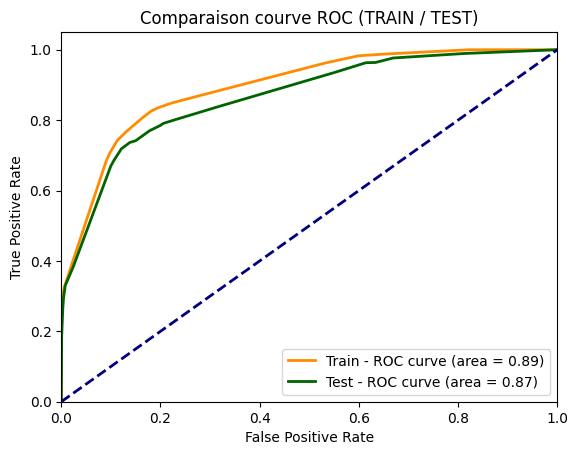

In [365]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()


In [366]:
from sklearn.metrics import log_loss
print("log loss app : " + str(log_loss(y_train, y_train_predict_proba)))
print("log loss test : " + str(log_loss(y_test, y_test_predict_proba)))

log loss app : 0.3571464897365888
log loss test : 0.5315989490809134


In [367]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
Confusion_matrix_app = confusion_matrix(y_train, y_train_predict)
Confusion_matrix_test= confusion_matrix(y_test, y_test_predict)
print(Confusion_matrix_app)
print(Confusion_matrix_test)

[[1098  140]
 [ 148  427]]
[[20343  2809]
 [ 3181  8129]]


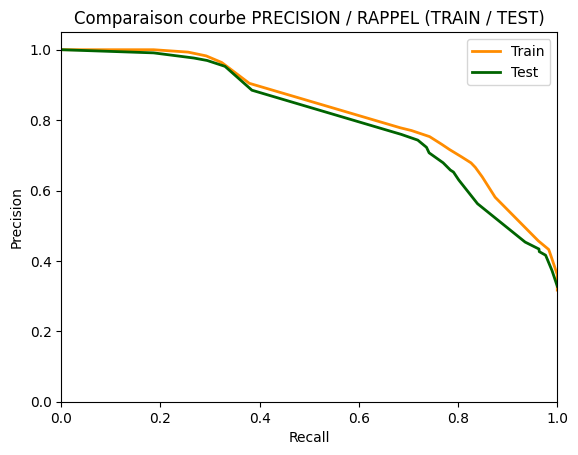

In [368]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train,
                                                                         y_train_predict_proba)
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, 
                                                                      y_test_predict_proba)
plt.figure()
lw = 2
plt.plot(recall_train,precision_train, color='darkorange',
         lw=lw, label='Train')

plt.plot(recall_test,precision_test, color='darkgreen',
         lw=lw, label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL (TRAIN / TEST)')
plt.legend(loc="upper right")
plt.show()

* Selction des variables les plus importantes :

In [369]:
# Sélection des variables avec une importance > 0.01
selected_features = importance_variable[importance_variable["Feature Importance"] > 0.01]["Variable"].tolist()

In [370]:
selected_features

['lead_time',
 'booking_status_%_market_segment_type',
 'no_of_special_requests',
 'avg_price_per_room',
 'no_of_adults',
 'no_of_weekend_nights']

In [371]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

tree.fit(X_train_selected, y_train)
y_pred = tree.predict(X_test_selected)

* Re évaluation du modèle apres selction :

In [372]:
# Résultats : prédiction du modèle, si proba >=0.5 prediction = 1 ou 0
y_train_predict_slct = tree.predict(X_train_selected)
print("Vecteur de prédiction :")
print(y_train_predict_slct)

Vecteur de prédiction :
[0 1 0 ... 0 1 1]


In [373]:
# Calcul des probabilités prédites 
print("\n Probabilités :")
print(tree.predict_proba(X_train_selected))


 Probabilités :
[[0.58536585 0.41463415]
 [0.02439024 0.97560976]
 [0.85465116 0.14534884]
 ...
 [1.         0.        ]
 [0.         1.        ]
 [0.33712121 0.66287879]]


In [374]:
# On conserve en mémoire uniquement la probabilité de l'événement cible

y_train_predict_proba_slct = tree.predict_proba(X_train_selected)[:,1]
print("\n Vecteur de probabilité de l'événement cible")
print(y_train_predict_proba_slct)
y_test_predict_proba_slct = tree.predict_proba(X_test_selected)[:,1]


 Vecteur de probabilité de l'événement cible
[0.41463415 0.97560976 0.14534884 ... 0.         1.         0.66287879]


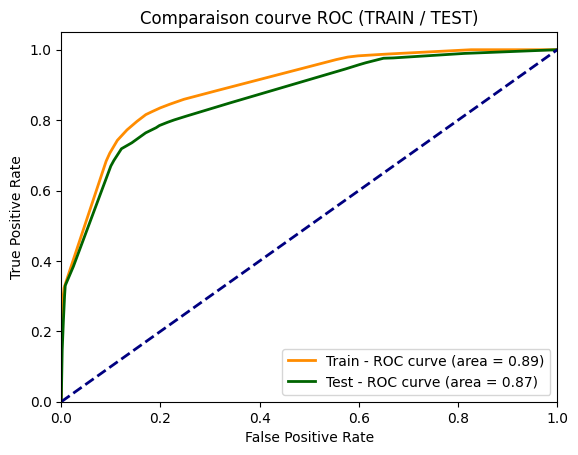

In [375]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba_slct)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba_slct)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()


In [376]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict_slct))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1238
           1       0.75      0.74      0.75       575

    accuracy                           0.84      1813
   macro avg       0.82      0.81      0.82      1813
weighted avg       0.84      0.84      0.84      1813



In [377]:
from sklearn.metrics import log_loss
print("log loss app : " + str(log_loss(y_train, y_train_predict_proba)))
print("log loss test : " + str(log_loss(y_test, y_test_predict_proba)))

log loss app : 0.3571464897365888
log loss test : 0.5315989490809134


Parfois, même après avoir réduit le nombre de variables, le modèle peut toujours donner des résultats très similaires si les variables restantes sont déjà suffisantes pour prédire correctement l'issue. Cela indique que le modèle est robuste et que certaines variables moins importantes n'apportaient pas d'information supplémentaire significative.

* Seuils

In [378]:
## Choix du seuil - Tableau seuil /
table_choix_seuil = pd.DataFrame()
table_choix_seuil["SEUIL"] = [0] + list(thresholds_train)
table_choix_seuil["Precision_train"] = precision_train
table_choix_seuil["Recall_train"] = recall_train

f1_scores = 2 * (precision_train * recall_train) / (precision_train + recall_train)
table_choix_seuil["f1_scores"] = f1_scores


table_choix_seuil.sort_values(by = "SEUIL", axis=0, ascending=False, inplace=True)
print(table_choix_seuil)

       SEUIL  Precision_train  Recall_train  f1_scores
21  1.000000         1.000000      0.000000   0.000000
20  0.975610         1.000000      0.186087   0.313783
19  0.913043         0.993243      0.255652   0.406639
18  0.818182         0.982456      0.292174   0.450402
17  0.666667         0.963731      0.323478   0.484375
16  0.662879         0.904564      0.379130   0.534314
15  0.590909         0.778218      0.683478   0.727778
14  0.525000         0.770398      0.706087   0.736842
13  0.388889         0.753086      0.742609   0.747811
12  0.360000         0.731343      0.766957   0.748727
11  0.358974         0.716561      0.782609   0.748130
10  0.333333         0.695652      0.806957   0.747182
9   0.238095         0.678571      0.826087   0.745098
8   0.186047         0.665742      0.834783   0.740741
7   0.147059         0.638743      0.848696   0.728902
6   0.145349         0.580831      0.874783   0.698126
5   0.125000         0.457025      0.961739   0.619608
4   0.0454

A present pour choisir le seuil cela depend de notre objectif. 

Si INN Hotels Group subit des coûts importants en traitant des réservations comme annulées alors qu'elles ne le sont pas -> maximiser la précision (pour avoir le moins d'erreur).

Si le coût de ne pas anticiper une annulation est élevé -> maximiser le recall

Pour combienr les deux on pourrait aussi maximiser le F1-score (moyenne de la précision et du rappel). 

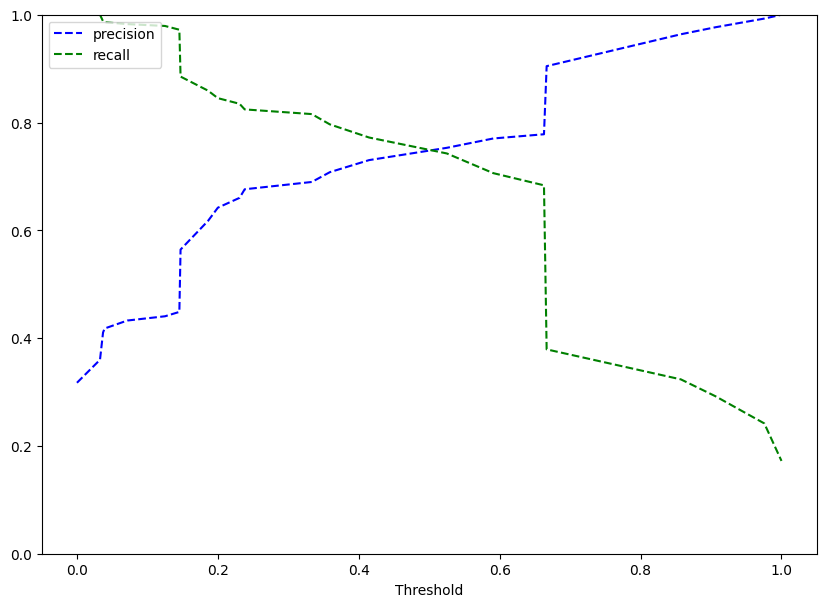

In [379]:
y_scores_tree = tree.predict_proba(X_train_selected)

precisions_tree, recalls_tree, thresholds_tree = precision_recall_curve(
    y_train, y_scores_tree[:, 1]
)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_tree, precisions_tree[:-1], 'b--', label='precision')
plt.plot(thresholds_tree, recalls_tree[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()

Bizarre ...

* Optimisation du modele : 

Pour optimiser les résultats, le choix des paramètres est très important. Plusieurs approches :

   - Méthode aléatoire
   - Méthode grid Search
   - Méthode Optimisation Bayesienne 

In [349]:
import random
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
# Création du dictionnaire des indicateurs que nous souhaitons testés pour la méthode Random ou GridSearch
param_dict = {
    'criterion': ['gini', 'entropy'], # Le critère de split des arbres
    'splitter': ['best','random'],    # Est-ce que l'on teste un échantillon de variable (random) 
                                        #ou toutes les variables (best) à chaque neoud
    'max_depth': [3,4,10],  # Profondeur maximum de l'arbre
    'min_samples_split': [2,4], # # Nombre d'observations mimnimum pour créer un split
    'min_samples_leaf': [1,5,10],     # Nombre d'observations minimum dans une feuille
    'min_weight_fraction_leaf': [0,0.01], # Proportion minimum des observations dans une feuille
    'max_features': ['log2',"sqrt"]}

#Création  du dictionnaire de recherche pour la méthode d'optimisation bayesienne


clf = DecisionTreeClassifier() 
# Définition des paramètres avec des lois de probabilités
param_dict_bayes = {
    'criterion': Categorical(['gini', 'entropy']), 
    'splitter': Categorical(['best','random']),
    'max_depth': Integer(3,30),
    'min_samples_split': Integer(2,50),
    'min_samples_leaf': Integer(1,20),
    'min_weight_fraction_leaf': Real(0,0.5, prior='uniform')}

# Grilles des paramètres

NB_ITER = 5 # Nombre d'itéations maximum pour le Random et l'optimisation Bayesienne 

#Tirage aléatoire d'une combinaison de paramètre

from sklearn.model_selection import cross_validate
# Définition d'une fonction 
def random_parameter(clf,param_dict,n_iter,X_train,y_train,nb_cv) :
    res = pd.DataFrame()
    compt = 0
    num_iter = []
    auc=[]
    param = []
    while compt <n_iter :
        compt = compt +1
        params = {key: random.sample(value, 1)[0] for key, value in param_dict.items()}
        clf.set_params(**params)
        scores = cross_validate(clf, X_train, y_train, cv=5,
                        scoring = ['roc_auc'])
        num_iter.append(compt)
        param.append(params)
        auc.append(scores['test_roc_auc'].mean())
    
    res["Num_ITER"] = num_iter
    res["Param"] = param
    res["Auc"] = auc
    
    return res
  
 

from timeit import default_timer as timer
start = timer()  
Random_Res_Tree = random_parameter(DecisionTreeClassifier() ,param_dict,NB_ITER,X_train,y_train,5)
delais = timer()- start
print(" #### RECHERCHE ALEATOIRE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
Random_Res_Tree.sort_values('Auc', ascending = False, inplace = True)
Random_Res_Tree.head()
# Récupère les paramètres qui nous intéresse :
best_param_random_search = list(Random_Res_Tree["Param"])[0]
print("\n Paramètres recherche aléatoire : ")
print(best_param_random_search)

print("\n Résultats recherche aléatoire : " + str(Random_Res_Tree['Auc'].max()))


####  choix des paramètres : utilisation du  Grid Search


from sklearn.model_selection import GridSearchCV
 
start = timer()  
Grid_Search = GridSearchCV(DecisionTreeClassifier(),param_dict,scoring='roc_auc',cv=5)
Grid_Search.fit(X_train,y_train)
delais = timer()- start
print(" #### RECHERCHE GRID SEARCH #### ")
print(" \n Durée de recherche en minute :")
print(delais/60)
print("\n Paramètres grid search : ")
best_param_gid_search = Grid_Search.best_params_
print(best_param_gid_search)
best_score_grid_search = Grid_Search.best_score_
print("\n Résultats grid search  : " + str(best_score_grid_search))



opt = BayesSearchCV(clf,param_dict_bayes , n_iter=NB_ITER,cv=5,scoring = 'roc_auc')
start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start

print(" #### RECHERCHE OPTIMISATION #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres grid search : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats grid search  : " + str(best_score_opti_bayes))

 #### RECHERCHE ALEATOIRE #### 
 
 Durée de recherche en seconde :
0.07043337500363123

 Paramètres recherche aléatoire : 
{'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt'}

 Résultats recherche aléatoire : 0.86731321451392
 #### RECHERCHE GRID SEARCH #### 
 
 Durée de recherche en minute :
0.05690176041680388

 Paramètres grid search : 
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}

 Résultats grid search  : 0.8759676137063972
 #### RECHERCHE OPTIMISATION #### 
 
 Durée de recherche en seconde :
0.11704133299645036

 Paramètres grid search : 
OrderedDict({'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 20, 'min_samples_split': 18, 'min_weight_fraction_leaf': 0.016782312377985168, 'splitter': 'best'})

 Résultats grid search  : 0.8797265475646687


In [ ]:
# la methode la plus performante semble etre la grid search 

J'ai cherché aussi à optimiser les parametre test_sizes dans train_test_split. J'ai donc :

In [350]:
from sklearn.metrics import roc_auc_score

In [351]:
list_size = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

results = []

for test_size in list_size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    opt = BayesSearchCV(DecisionTreeClassifier(), param_dict_bayes, n_iter=NB_ITER, cv=5, scoring='roc_auc', random_state=42)
    opt.fit(X_train, y_train)

    y_pred_proba = opt.best_estimator_.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'test_size': test_size,
        'best_params': opt.best_params_,
        'auc': auc
    })

for result in results:
    print(f"Test Size: {result['test_size']}, Best Params: {result['best_params']}, AUC: {result['auc']}")


Test Size: 0.5, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8428284323070983
Test Size: 0.55, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8415123146620767
Test Size: 0.6, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8417438973201316
Test Size: 0.65, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8415932697897804
Test Size: 0.7, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_sa

In [ ]:
list_size = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

results_bayes = []
results_grid = []

for test_size in list_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Bayes
    opt_bayes = BayesSearchCV(DecisionTreeClassifier(), param_dict_bayes, n_iter=NB_ITER, cv=5, scoring='roc_auc', random_state=42)
    opt_bayes.fit(X_train, y_train)
    y_pred_proba = opt_bayes.best_estimator_.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    results_bayes.append({
        'test_size': test_size,
        'best_params': opt_bayes.best_params_,
        'auc': auc,
        'best_score' : opt_bayes.best_score_
    })

    # Gridsearch
    Grid_Search = GridSearchCV(DecisionTreeClassifier(),param_dict,scoring='roc_auc',cv=5)
    Grid_Search.fit(X_train,y_train)
    y_pred_proba = Grid_Search.best_estimator_.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    results_grid.append({
        'test_size': test_size,
        'best_params': Grid_Search.best_params_,
        'auc': auc,
        'best_score': Grid_Search.best_score_
    })

for result in results_bayes:
    print(f"Test Size: {result['test_size']}, Best Params: {result['best_params']}, AUC: {result['auc']}, Best score: {result["best_score"]}")
for result in results_grid:
    print(f"Test Size: {result['test_size']}, Best Params: {result['best_params']}, AUC: {result['auc']}, Best score: {result["best_score"]}")


Test Size: 0.5, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8428284323070983, Best score: 0.8369721056608579
Test Size: 0.55, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8415123146620767, Best score: 0.8370013674150165
Test Size: 0.6, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8417438973201316, Best score: 0.8368767007278584
Test Size: 0.65, Best Params: OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), AUC: 0.8415932697897804, Best score: 0

In [ ]:
max_auc_bayes = max(results_bayes, key=lambda x: x['auc'])
print("Max AUC Bayes:", max_auc_bayes)
max_auc_grid = max(results_grid, key=lambda x: x['auc'])
print("Max AUC grid:", max_auc_grid)

Max AUC Bayes: {'test_size': 0.5, 'best_params': OrderedDict({'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 23, 'min_weight_fraction_leaf': 0.0939775931836743, 'splitter': 'best'}), 'auc': np.float64(0.8428284323070983), 'best_score': np.float64(0.8369721056608579)}
Max AUC grid: {'test_size': 0.6, 'best_params': {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}, 'auc': np.float64(0.8971376116344576), 'best_score': np.float64(0.886747187199234)}


Pas de résultats réellement concluant pour dire quel est le meilleur decoupage à prendre.

* Graphiquement :

In [ ]:
# revoir ce code 

In [ ]:
# Comparaison des 3 modèles
import matplotlib.pyplot as plt
tree_random = DecisionTreeClassifier(**best_param_random_search)
tree_grid_search = DecisionTreeClassifier(**Grid_Search.best_params_)
tree_opti =  DecisionTreeClassifier(**opt.best_params_)

tree_random.fit(X_train,y_train)
fpr_train_random, tpr_train_random, thresholds_train_random = roc_curve(y_train, tree_random.predict_proba(X_train)[:,1])
roc_auc_train_random = auc(fpr_train_random, tpr_train_random)

tree_grid_search.fit(X_train,y_train)
fpr_train_grid_search, tpr_train_grid_search, thresholds_train_grid_search = roc_curve(y_train, tree_grid_search.predict_proba(X_train)[:,1])
roc_auc_train_grid_search = auc(fpr_train_grid_search, tpr_train_grid_search)

tree_opti.fit(X_train,y_train)
fpr_train_opti, tpr_train_opti, thresholds_train_opti = roc_curve(y_train, tree_opti.predict_proba(X_train)[:,1])
roc_auc_train_opti = auc(fpr_train_opti, tpr_train_opti)



plt.figure()
lw = 2
plt.plot(fpr_train_random, tpr_train_random, color='darkorange',
         lw=lw, label='Train -Arbre (Random) - ROC curve (area = %0.2f)' % roc_auc_train_random)

plt.plot(fpr_train_grid_search, tpr_train_grid_search, color='darkblue',
         lw=lw, label='Train -Arbre (Grid search) - ROC curve (area = %0.2f)' % roc_auc_train_grid_search)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()


fpr_test_random, tpr_test_random, _ = roc_curve(y_test, tree_random.predict_proba(X_test)[:,1])
roc_auc_test_random = auc(fpr_test_random, tpr_test_random)

fpr_test_grid_search, tpr_test_grid_search, _ = roc_curve(y_test, tree_grid_search.predict_proba(X_test)[:,1])
roc_auc_test_grid_search = auc(fpr_test_grid_search, tpr_test_grid_search)

fpr_test_opti, tpr_test_opti, _ = roc_curve(y_test, tree_opti.predict_proba(X_test)[:,1])
roc_auc_test_opti = auc(fpr_test_opti, tpr_test_opti)


plt.figure()
lw = 2
plt.plot(fpr_test_random, tpr_test_random, color='darkorange',
         lw=lw, label='test -Arbre (Random) - ROC curve (area = %0.2f)' % roc_auc_test_random)

plt.plot(fpr_test_grid_search, tpr_test_grid_search, color='darkblue',
         lw=lw, label='test -Arbre (Grid search) - ROC curve (area = %0.2f)' % roc_auc_test_grid_search)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC - TEST ')
plt.legend(loc="lower right")
plt.show()

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

TypeError: 'numpy.float64' object is not callable

### 2) Régression logistique 

* Normaliser les données continues : 

In [ ]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
continuous_columns = continuous_columns[continuous_columns !="booking_status"] 

In [ ]:
len(continuous_columns)

17

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

scaler.fit(X_train[continuous_columns])

X_train_norm[continuous_columns]= scaler.transform(X_train[continuous_columns])
X_test_norm[continuous_columns] = scaler.transform(X_test[continuous_columns])
X_train_norm

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33613      0.345968       -0.277485             -0.921361          -0.138256   
8734       0.345968       -0.277485             -0.921361          -0.884260   
11916      0.345968       -0.277485              0.251692          -0.884260   
28763      0.345968       -0.277485              1.424745           0.607749   
11871      2.275937       -0.277485             -0.921361           1.353753   
...             ...             ...                   ...                ...   
16850      0.345968       -0.277485              1.424745          -0.138256   
6265      -1.584001       -0.277485             -0.921361          -0.138256   
11284      0.345968       -0.277485             -0.921361          -0.138256   
860        0.345968       -0.277485             -0.921361           0.607749   
15795      0.345968       -0.277485             -0.921361          -0.138256   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
33613                    -0.16491   0.256771      0.476086      -0.443216   
8734                     -0.16491   0.895481      0.476086      -0.443216   
11916                    -0.16491  -0.207745     -2.100462       1.177500   
28763                    -0.16491  -0.033551      0.476086       1.177500   
11871                    -0.16491   2.149674      0.476086      -1.091503   
...                           ...        ...           ...            ...   
16850                    -0.16491  -0.486454     -2.100462       1.501643   
6265                     -0.16491   0.198707     -2.100462       0.853357   
11284                    -0.16491  -0.927745      0.476086      -0.767360   
860                      -0.16491   1.487739      0.476086      -0.443216   
15795                    -0.16491  -0.823229      0.476086       0.529214   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
33613     -0.644835       -0.146316                     -0.074422   
8734       1.664015       -0.146316                     -0.074422   
11916      0.625032       -0.146316                     -0.074422   
28763     -1.337490       -0.146316                     -0.074422   
11871      0.509590       -0.146316                     -0.074422   
...             ...             ...                           ...   
16850      1.202245       -0.146316                     -0.074422   
6265       0.047820       -0.146316                     -0.074422   
11284      0.971360       -0.146316                     -0.074422   
860       -0.991163       -0.146316                     -0.074422   
15795     -0.067623       -0.146316                     -0.074422   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33613                             -0.075859            0.756081   
8734                              -0.075859           -0.500663   
11916                             -0.075859           -0.678584   
28763                             -0.075859            0.551613   
11871                             -0.075859            0.191252   
...                                     ...                 ...   
16850                             -0.075859           -1.362027   
6265                              -0.075859           -0.655991   
11284                             -0.075859            0.191252   
860                               -0.075859            0.756081   
15795                             -0.075859            1.806662   

       no_of_special_requests  booking_status_%_type_of_meal_plan  \
33613                0.472341                           -0.402570   
8734                -0.790718                            0.044455   
11916                0.472341                           -0.402570   
28763                1.735399                           -0.402570   
11871               -0.790718                           -0.402570   
...                       ...                                 ...   
1685

In [ ]:
X_train

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33613             2               0                     0                  2   
8734              2               0                     0                  1   
11916             2               0                     1                  1   
28763             2               0                     2                  3   
11871             3               0                     0                  4   
...             ...             ...                   ...                ...   
16850             2               0                     2                  2   
6265              1               0                     0                  2   
11284             2               0                     0                  2   
860               2               0                     0                  3   
15795             2               0                     0                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
33613                           0        107          2018              6   
8734                            0        162          2018              6   
11916                           0         67          2017             11   
28763                           0         82          2018             11   
11871                           0        270          2018              4   
...                           ...        ...           ...            ...   
16850                           0         43          2017             12   
6265                            0        102          2017             10   
11284                           0          5          2018              5   
860                             0        213          2018              6   
15795                           0         14          2018              9   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
33613            10               0                             0   
8734             30               0                             0   
11916            21               0                             0   
28763             4               0                             0   
11871            20               0                             0   
...             ...             ...                           ...   
16850            26               0                             0   
6265             16               0                             0   
11284            24               0                             0   
860               7               0                             0   
15795            15               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33613                                     0              130.00   
8734                                      0               85.50   
11916                                     0               79.20   
28763                                     0              122.76   
11871                                     0              110.00   
...                                     ...                 ...   
16850                                     0               55.00   
6265                                      0               80.00   
11284                                     0              110.00   
860                                       0              130.00   
15795                                     0              167.20   

       no_of_special_requests  booking_status_%_type_of_meal_plan  \
33613                       1                            0.311802   
8734                        0                            0.331189   
11916                       1                            0.311802   
28763                       2                            0.311802   
11871                       0                            0.311802   
...                       ...                                 ...   
1685

* Modele 

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log.fit(X_train_norm,y_train)

y_train_predict_proba = reg_log.predict_proba(X_train_norm)[:,1]
y_test_predict_proba = reg_log.predict_proba(X_test_norm)[:,1]

table_coeff = pd.DataFrame()
table_coeff["Variable"]=continuous_columns
table_coeff["Coefficient"] = reg_log.coef_[0]
table_coeff["Odds Ratio"] = np.exp(table_coeff["Coefficient"])

print(table_coeff)

print("Intercept : " + str(reg_log.intercept_))

                                Variable  Coefficient  Odds Ratio
0                           no_of_adults     0.025356    1.025680
1                         no_of_children    -0.006048    0.993971
2                   no_of_weekend_nights    -0.031711    0.968786
3                      no_of_week_nights    -0.000633    0.999367
4             required_car_parking_space    -0.261418    0.769959
5                              lead_time     1.260582    3.527475
6                           arrival_year     0.348768    1.417320
7                          arrival_month    -0.055832    0.945698
8                           arrival_date    -0.033080    0.967461
9                         repeated_guest    -0.407009    0.665638
10          no_of_previous_cancellations    -0.064613    0.937430
11  no_of_previous_bookings_not_canceled    -0.033275    0.967272
12                    avg_price_per_room     0.505707    1.658157
13                no_of_special_requests    -1.112695    0.328672
14    book

- lead_time et booking_status_%_market_segment_type semblent avoir une forte influence.

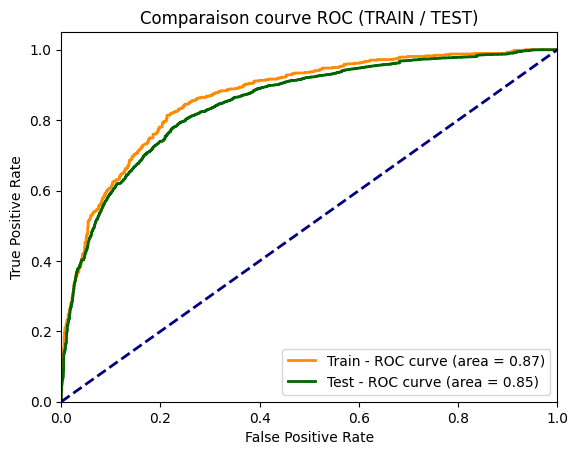

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

Marche mieux que l'arbre 

La régression avec scikit learn ne donne pas d'information sur la pertinence des coefficients. Pour aller plus loin et détecter la pertinence des coefficients, nous allons utiliser le package statsmodels

In [ ]:
import statsmodels as sm
from statsmodels.api import Logit

In [ ]:
X_train_norm["const"] =1
X_test_norm["const"]=1 # pour ajouter l'intercept
lr = Logit(endog=y_train,exog=X_train_norm)

reg = lr.fit()
print(reg.summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                 1813
Model:                          Logit   Df Residuals:                     1795
Method:                           MLE   Df Model:                           17
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                    -inf
Time:                        17:13:29   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -1132.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                            -0.0746      0.115     -0.646      0.518      -0.301     

Ainsi on peut constater que les variables no_of_weekend_nights, type_of_meal_plan, required_car_parking_space, lead_time, arrival_year, arrival_month, avg_price_per_room, no_of_special_requests et booking_status_%_market_segment_type sont significatives au seuil de 5%.

Ces resultats ce rapproches des resultats precedents avec les odss ratios.

**ATTENTION : "Warning: Maximum number of iterations has been exceeded."**

Cela signifie que l'algorithme d'optimisation utilisé pour estimer les paramètres de la régression logistique n'a pas trouvé une solution stable dans le nombre maximal d'itérations spécifié. En général, cela peut se produire pour plusieurs raisons :

Complexité du modèle : Si ton modèle est trop complexe par rapport à la quantité de données ou à la qualité des données, il peut être difficile d'atteindre la convergence.

Multicolinéarité : Si certaines variables indépendantes sont fortement corrélées entre elles, cela peut rendre le modèle instable et affecter la convergence.

Données aberrantes ou extrêmes : La présence de valeurs extrêmes peut influencer le processus d'estimation et causer des problèmes de convergence.

Échelle des données : Si les variables ne sont pas à la même échelle (par exemple, certaines ont des valeurs beaucoup plus grandes que d'autres), cela peut également compliquer l'optimisation.


In [ ]:
# Choisi en fonction des p-value mais a revoir car p-value semblent bizarres
var_train_reg = [
    "no_of_weekend_nights",
    "required_car_parking_space",
    "lead_time",
    "arrival_year",
    "arrival_month",
    "avg_price_per_room",
    "no_of_special_requests",
    "booking_status_%_market_segment_type"
]

In [ ]:
lr = Logit(endog=y_train,exog=X_train_norm[var_train_reg])

reg = lr.fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.526553
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                 1813
Model:                          Logit   Df Residuals:                     1805
Method:                           MLE   Df Model:                            7
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                  0.1571
Time:                        17:18:42   Log-Likelihood:                -954.64
converged:                       True   LL-Null:                       -1132.6
Covariance Type:            nonrobust   LLR p-value:                 6.717e-73
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_weekend_nights                    -0.0474      0.0

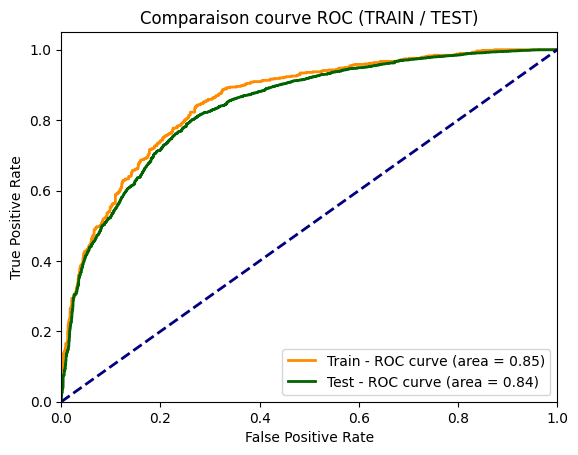

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, reg.predict(X_train_norm[var_train_reg]))
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, reg.predict(X_test_norm[var_train_reg]))
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()



Resultats légerement moins bon que le modèle complet avec toutes les variables 

* Importance des variables

In [ ]:
reg_log = LogisticRegression(fit_intercept=True) # Pas d'intercept parce qu'il n'a pas été conservé précédement


# del X_train_norm["const"]
# del X_test_norm["const"]
# if "const" in var_train_reg : 
#     var_train_reg.remove("const")
    
reg_log.fit(X_train_norm[var_train_reg],y_train)
y_train_predict_proba = reg_log.predict_proba(X_train_norm[var_train_reg])[:,1]
y_test_predict_proba = reg_log.predict_proba(X_test_norm[var_train_reg])[:,1]

table_coeff = pd.DataFrame()
table_coeff["Variable"]=var_train_reg
table_coeff["Coefficient"] = reg_log.coef_[0]
print(table_coeff)

print("Intercept : " + str(reg_log.intercept_))


                               Variable  Coefficient
0                  no_of_weekend_nights    -0.038905
1            required_car_parking_space    -0.275273
2                             lead_time     1.260706
3                          arrival_year     0.356199
4                         arrival_month    -0.042368
5                    avg_price_per_room     0.431037
6                no_of_special_requests    -1.107908
7  booking_status_%_market_segment_type     1.240057
Intercept : [-1.34924387]


In [ ]:
table_coeff["Val_ABS_Coefficient"]=abs(table_coeff["Coefficient"])
table_coeff.sort_values(by =["Val_ABS_Coefficient"], inplace = True, ascending=False)
table_coeff.head(5)

Variable  Coefficient  Val_ABS_Coefficient
2                             lead_time     1.260706             1.260706
7  booking_status_%_market_segment_type     1.240057             1.240057
6                no_of_special_requests    -1.107908             1.107908
5                    avg_price_per_room     0.431037             0.431037
3                          arrival_year     0.356199             0.356199

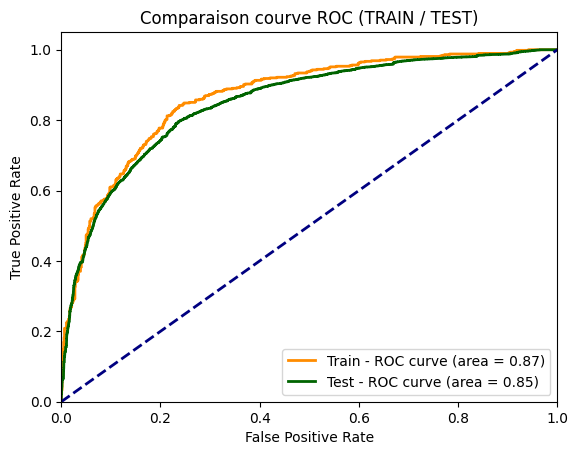

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


param_dict_bayes_elasticnet = {
    'penalty': Categorical(['elasticnet']), 
    'solver': Categorical(['saga']),
    'l1_ratio' : Real(0,0.99, prior='uniform'),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform')}

param_dict_bayes_l1 = {
    'penalty': Categorical(['l1']), 
    'solver': Categorical(['liblinear','saga']),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.9, prior='uniform')}

param_dict_bayes_l2 = {
    'penalty': Categorical(['l2']), 
    'solver': Categorical(['newton-cg', 'lbfgs','sag', 'saga']),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform')}  


opt = BayesSearchCV(LogisticRegression(),[(param_dict_bayes_elasticnet,10),
                         (param_dict_bayes_l1,10),(param_dict_bayes_l2,10)],
                         cv=5,scoring = 'roc_auc')
                         
start = timer()  
opt.fit(X_train_norm, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))



 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### 
 
 Durée de recherche en seconde :
0.667751374974614

 Paramètres optimaux : 
OrderedDict({'C': 0.7609312914471026, 'fit_intercept': True, 'l1_ratio': 0.32152397462198257, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.013386152074515992})

 Résultats  : 0.8564724236419077


* Interpretation resultats : 

In [ ]:
reg_log = LogisticRegression(**opt.best_params_)
ref_log = LogisticRegression()
reg_log.fit(X_train_norm,y_train)

table_coeff = pd.DataFrame()
table_coeff["Variable"]=continuous_columns
table_coeff["Coefficient"] = reg_log.coef_[0]
print(table_coeff)

print("Intercept : " + str(reg_log.intercept_))


                                Variable   Coefficient
0                           no_of_adults  3.745032e-02
1                         no_of_children  1.786264e-04
2                   no_of_weekend_nights -1.737136e-02
3                      no_of_week_nights  7.464277e-03
4             required_car_parking_space -2.320725e-01
5                              lead_time  1.159396e+00
6                           arrival_year  3.675989e-01
7                          arrival_month -3.943065e-02
8                           arrival_date -2.424633e-02
9                         repeated_guest -1.525959e-01
10          no_of_previous_cancellations -3.383707e-08
11  no_of_previous_bookings_not_canceled -3.245883e-03
12                    avg_price_per_room  4.712023e-01
13                no_of_special_requests -9.844004e-01
14    booking_status_%_type_of_meal_plan -2.584100e-02
15   booking_status_%_room_type_reserved -1.355757e-01
16  booking_status_%_market_segment_type  8.254267e-01
Intercept 

Cas si les données ne sont pas normalisées : 

In [ ]:
reg_log_non_norm = LogisticRegression(**opt.best_params_)
ref_log_non_norm = LogisticRegression()
reg_log_non_norm.fit(X_train,y_train)



table_coeff_non_norm = pd.DataFrame()
table_coeff_non_norm["Variable"]=continuous_columns
table_coeff_non_norm["Coefficient"] = reg_log_non_norm.coef_[0]
print(table_coeff_non_norm)

print("Intercept : " + str(reg_log_non_norm.intercept_))

                                Variable   Coefficient
0                           no_of_adults  9.945288e-06
1                         no_of_children -1.650505e-05
2                   no_of_weekend_nights  8.586116e-06
3                      no_of_week_nights  3.770264e-05
4             required_car_parking_space -6.187745e-05
5                              lead_time  1.318658e-02
6                           arrival_year -1.510682e-03
7                          arrival_month -1.259243e-03
8                           arrival_date -4.528395e-04
9                         repeated_guest -2.900816e-05
10          no_of_previous_cancellations -2.343207e-05
11  no_of_previous_bookings_not_canceled -1.493747e-04
12                    avg_price_per_room  1.012516e-02
13                no_of_special_requests -1.095140e-03
14    booking_status_%_type_of_meal_plan -3.364606e-06
15   booking_status_%_room_type_reserved -2.184285e-07
16  booking_status_%_market_segment_type  3.594085e-05
Intercept 

* Comparaison des resultats entre arbre de décision et regression logistique

NameError: name 'fpr_train_opti' is not defined

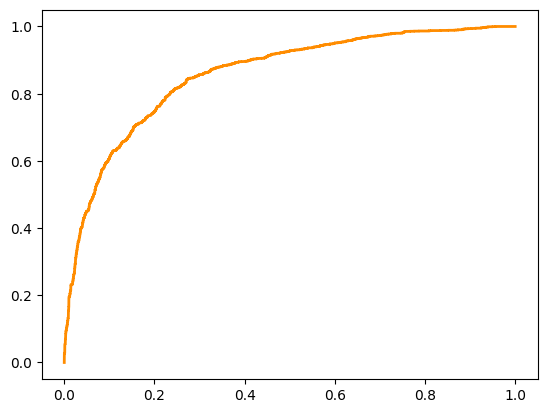

In [ ]:
# A revoir
fpr_train_reg_log, tpr_train_reg_log, thresholds_train_reg_log = roc_curve(y_train, reg_log.predict_proba(X_train_norm)[:,1])
roc_auc_train_reg_log = auc(fpr_train_reg_log, tpr_train_reg_log)



plt.figure()
lw = 2
plt.plot(fpr_train_reg_log, tpr_train_reg_log, color='darkorange',
         lw=lw, label='Train -Reg log - ROC curve (area = %0.2f)' % roc_auc_train_reg_log)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Abre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()


fpr_test_reg_log, tpr_test_reg_log, thresholds_test_reg_log = roc_curve(y_test, reg_log.predict_proba(X_test_norm)[:,1])
roc_auc_test_reg_log = auc(fpr_test_reg_log, tpr_test_reg_log)



plt.figure()
lw = 2
plt.plot(fpr_test_reg_log, tpr_test_reg_log, color='darkorange',
         lw=lw, label='test -Reg log - ROC curve (area = %0.2f)' % roc_auc_test_reg_log)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC - TEST ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL


precision_train_reg_log, recall_train_reg_log, thresholds_train_reg_log = precision_recall_curve(y_train,
                                                                         reg_log.predict_proba(X_train_norm)[:,1])
plt.figure()
lw = 2
plt.plot(recall_train_reg_log,precision_train_reg_log, color='darkorange',
         lw=lw,  label='Train -Reg log')

plt.plot(recall_train_opti,precision_train_opti, color='darkgreen',
         lw=lw, label='Train - Arbre (Opti)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="upper right")
plt.show()


# Vérification sur le test

precision_test_reg_log, recall_test_reg_log, thresholds_test_reg_log = precision_recall_curve(y_test,
                                                                         reg_log.predict_proba(X_test_norm)[:,1])

plt.figure()
lw = 2
plt.plot(recall_test_reg_log,precision_test_reg_log, color='darkorange',
         lw=lw,  label='Test -Reg log')

plt.plot(recall_test_opti,precision_test_opti, color='darkgreen',
         lw=lw, label='Test - Arbre (Opti)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

### 3) Test de selection de variables avec lasso :

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Ajuster un modèle Lasso avec régression logistique
lasso = LogisticRegression(penalty='l1', solver='liblinear') 
lasso.fit(X_train_norm, y_train)

# Sélectionner les variables avec des coefficients non nuls
selector = SelectFromModel(lasso, threshold='mean', max_features=10)  # Seuil basé sur la moyenne
X_train_lasso = selector.transform(X_train_norm)
X_test_lasso = selector.transform(X_test_norm)

# Afficher les variables sélectionnées
selected_features = X_train_norm.columns[selector.get_support()]
print("Variables sélectionnées par Lasso : ", selected_features)


Variables sélectionnées par Lasso :  Index(['lead_time', 'arrival_year', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status_%_market_segment_type'],
      dtype='object')


### 4) XGBoost 

Faire sur kaggle marche pas sur vscode je ne sais pas pourquoi 

In [ ]:
import xgboost as xgb


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
#XGBOOST
import xgboost as xgb


param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gbtree']), #,'gblinear','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train,y_train)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
